# PROJECT: SALARY PREDICTION WITH MACHINE LEARNING (PROJE: MAKİNE ÖĞRENMESİ İLE MAAŞ TAHMİNİ)

## Business Problem (İş Problemi)

- Can a machine learning project be carried out to estimate the salaries of baseball players whose salary information and career statistics for 1986 are shared? (Maaş bilgileri ve 1986 yılına ait kariyer istatistikleri paylaşılan beyzbol oyuncularının maaş tahminleri için bir makine öğrenmesi projesi gerçekleştirilebilir mi?)

## Data Set Story (Veri seti hikayesi)

- This dataset was originally retrieved from the StatLib library at Carnegie Mellon University. (Bu veri seti orijinal olarak Carnegie Mellon Üniversitesi'nde bulunan StatLib kütüphanesinden alınmıştır.)
  
- The data set is part of the data used in the 1988 ASA Graphics Section Poster Session. (Veri seti 1988 ASA Grafik Bölümü Poster Oturumunda kullanılan verilerin bir parçasıdır.)
  
- Salary data originally from Sports Illustrated, April 20, 1987. (Maaş verileri orijinal olarak Sports Illustrated, 20 Nisan 1987'den alınmıştır.)

- 1986 and career statistics are obtained from the 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York. (1986 ve kariyer istatistikleri, Collier Books, Macmillan Publishing Company, New York tarafından yayınlanan 1987 Beyzbol Ansiklopedisi Güncellemesinden elde edilmiştir.)

- AtBat: Number of hits made with a baseball bat in the 1986-1987 season (1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı)

- Hits: Number of hits in the 1986-1987 season (1986-1987 sezonundaki isabet sayısı)

- HmRun: Most valuable hits in the 1986-1987 season (1986-1987 sezonundaki en değerli vuruş sayısı)

- Runs: The points he scored for his team in the 1986-1987 season (1986-1987 sezonunda takımına kazandırdığı sayı)

- RBI: Number of runs a batsman scores when batting (Bir vurucunun vuruş yaptıgında koşu yaptırdığı oyuncu sayısı)

- Walks: Number of mistakes made by the opposing player (Karşı oyuncuya yaptırılan hata sayısı)

- Years: Player's playing time in the major league (years) (Oyuncunun major liginde oynama süresi (sene))

- CAtBat: Number of times a player has kicked the ball in his career (Oyuncunun kariyeri boyunca topa vurma sayısı)

- CHits: Number of hits made by the player throughout his career (Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı)

- CHmRun: The player's most valuable point in his career (Oyuncunun kariyeri boyunca yaptığı en değerli sayısı)

- CRuns: Number of points scored by the player for his team during his career (Oyuncunun kariyeri boyunca takımına kazandırdığı sayı)

- CRBI: Number of players the player has coached during his career (Oyuncunun kariyeri boyunca koşu yaptırdırdığı oyuncu sayısı)

- CWalks: Number of mistakes a player has made against an opposing player throughout his career (Oyuncun kariyeri boyunca karşı oyuncuya yaptırdığı hata sayısı)

- League: A factor with A and N levels showing the league in which the player played until the end of the season (Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör)

- Division: A factor with levels E and W indicating the player's playing position at the end of 1986 (1986 sonunda oyuncunun oynadığı pozisyonu gösteren E ve W seviyelerine sahip bir faktör)

- PutOuts: Helping your teammate in the game (Oyun icinde takım arkadaşınla yardımlaşma)

- Assits: Number of assists made by the player in the 1986-1987 season (1986-1987 sezonunda oyuncunun yaptığı asist sayısı)

- Errors: Number of errors of the player in the 1986-1987 season (1986-1987 sezonundaki oyuncunun hata sayısı)

- Salary: Salary of the player in the 1986-1987 season (in thousands) (Oyuncunun 1986-1987 sezonunda aldığı maaş(bin uzerinden))

- NewLeague: A factor with A and N levels indicating the player's league at the start of the 1987 season (1987 sezonunun başında oyuncunun ligini gösteren A ve N seviyelerine sahip bir faktör)

## Required Libraries and Functions (Gerekli Kütüphane ve Fonksiyonlar)

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [353]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [354]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler

In [355]:
import warnings
warnings.filterwarnings('ignore')

In [356]:
def load():
    data = pd.read_csv('hitters.csv')
    return data

In [357]:
df = load()

In [358]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    
    print("##################### Types #####################")
    print(dataframe.dtypes)
    
    print("##################### Head #####################")
    print(dataframe.head(head))
    
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    
    print("##################### Describe #####################")
    print(dataframe.describe().T)
    
    print("##################### Quantiles #####################")
    numeric_col = [col for col in dataframe.columns if dataframe[col].dtype in ['int64', 'float64']]
    numeric_col = dataframe[numeric_col]
    print(numeric_col.quantile([0, 0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1]).T)

In [359]:
check_df(df)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head #####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    32

In [360]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} ({df[col].dtype})")
    print('-------------------------------------------------------------')

AtBat: 247 (int64)
-------------------------------------------------------------
Hits: 144 (int64)
-------------------------------------------------------------
HmRun: 36 (int64)
-------------------------------------------------------------
Runs: 96 (int64)
-------------------------------------------------------------
RBI: 103 (int64)
-------------------------------------------------------------
Walks: 89 (int64)
-------------------------------------------------------------
Years: 22 (int64)
-------------------------------------------------------------
CAtBat: 314 (int64)
-------------------------------------------------------------
CHits: 288 (int64)
-------------------------------------------------------------
CHmRun: 146 (int64)
-------------------------------------------------------------
CRuns: 261 (int64)
-------------------------------------------------------------
CRBI: 262 (int64)
-------------------------------------------------------------
CWalks: 248 (int64)
---------------

## Exploratory Data Analysis (EDA) (Keşifsel Veri Analizi)

1. Outliers (Aykırı Değerler)
2. Missing Values (Eksik Değerler)
3. Feature Extraction (Özellik Çıkarımı)
4. Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)
5. Feature Scaling (Özellik Ölçeklendirme)rme)

### Selection of Variables According to Their Structure (Değişkenlerin Yapısına Göre Seçimi)

In [361]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtype != 'O']
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtype == 'O']
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    #num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car

In [362]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


### 1. Outliers (Aykırı Değerler)

In [363]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit 

In [364]:
def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [365]:
def grab_outliers(dataframe, col_name, index=False, q1=0.25, q3=0.75):
    low, up = outlier_thresholds(dataframe, col_name, q1, q3)
    
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])
        
    if index:
        outliers_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outliers_index

In [366]:
def replace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [367]:
def count_outliers(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    
    outliers = dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)]
    
    return outliers.shape[0]


In [368]:
for col in num_cols:
    outlier_count = count_outliers(df, col)
    print(col, ':', outlier_count)

AtBat : 0
Hits : 0
HmRun : 2
Runs : 1
RBI : 1
Walks : 1
Years : 2
CAtBat : 5
CHits : 6
CHmRun : 32
CRuns : 5
CRBI : 26
CWalks : 20
PutOuts : 36
Assists : 23
Errors : 9
Salary : 11


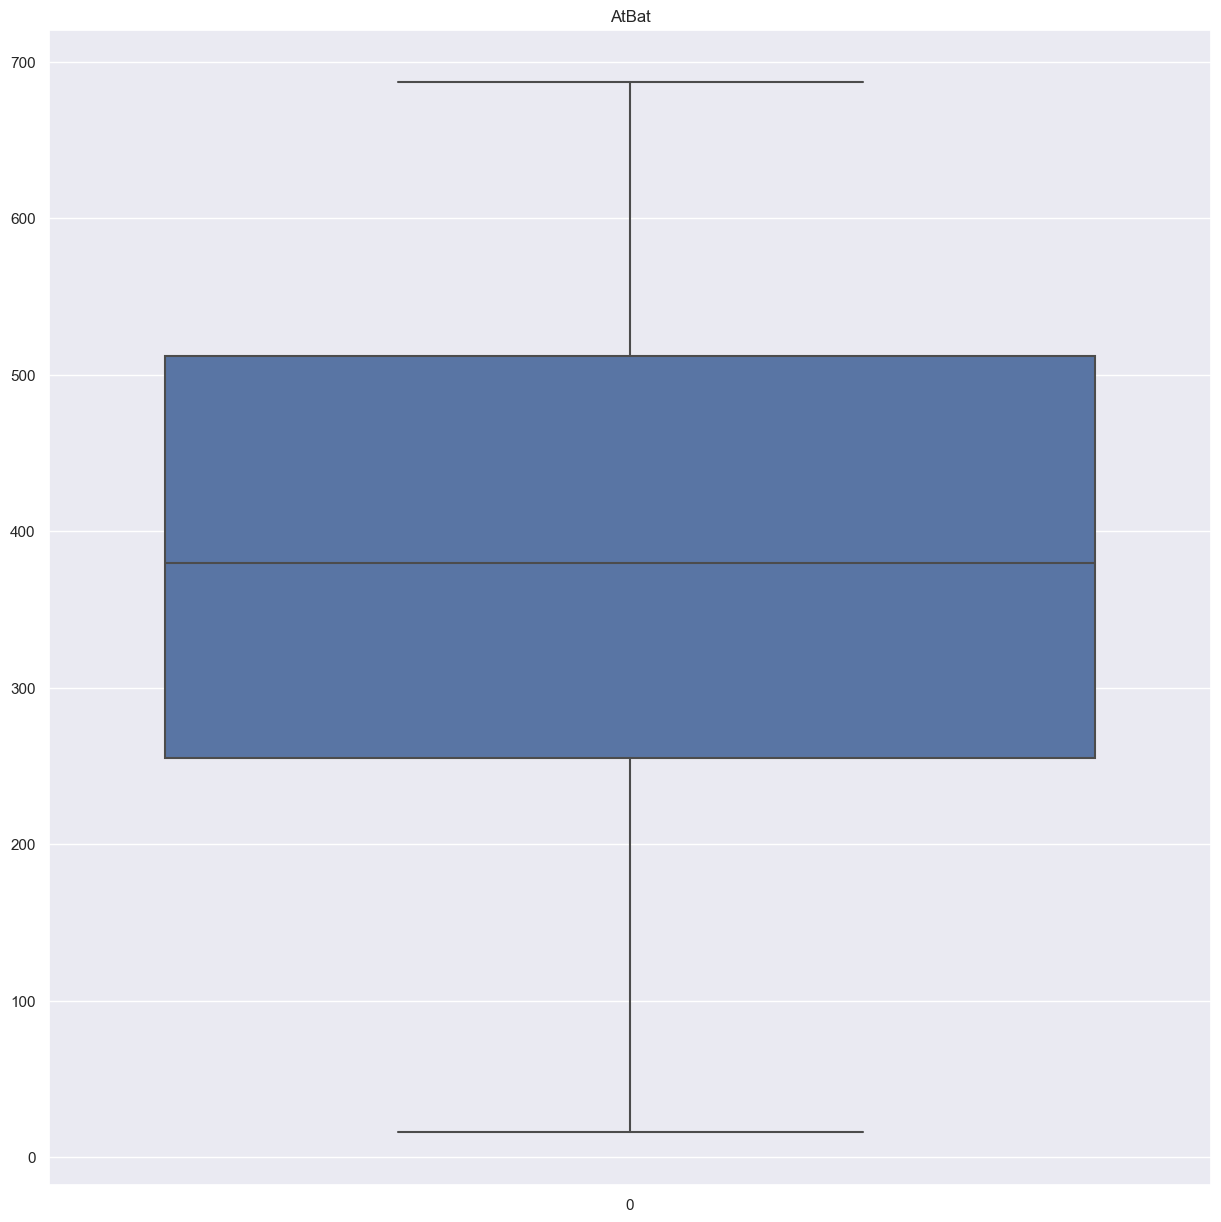

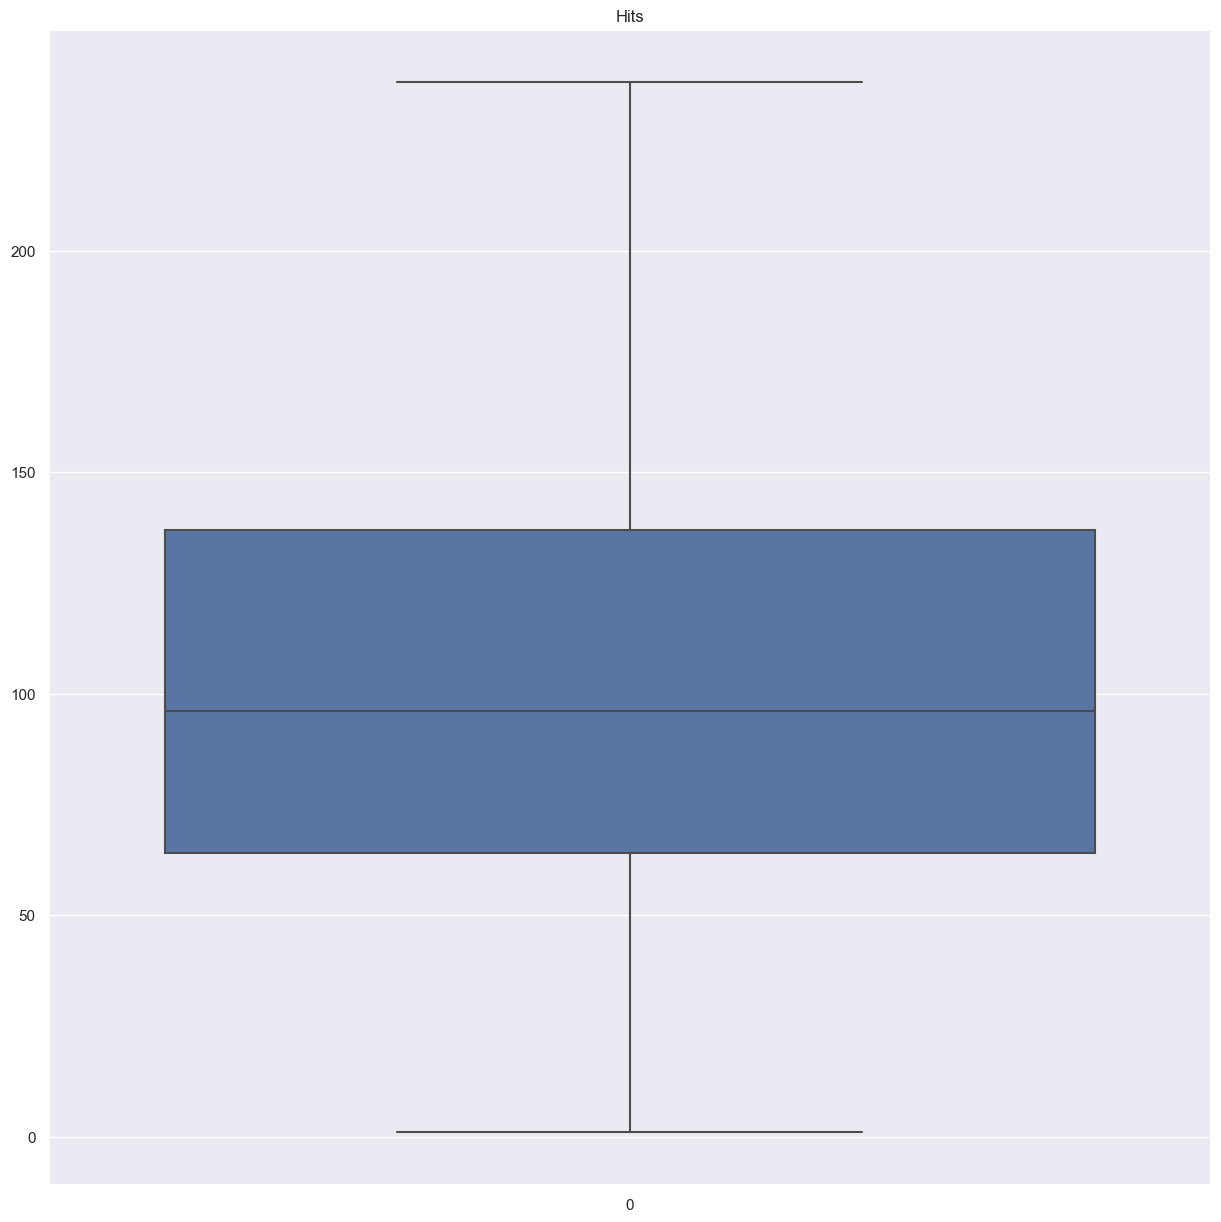

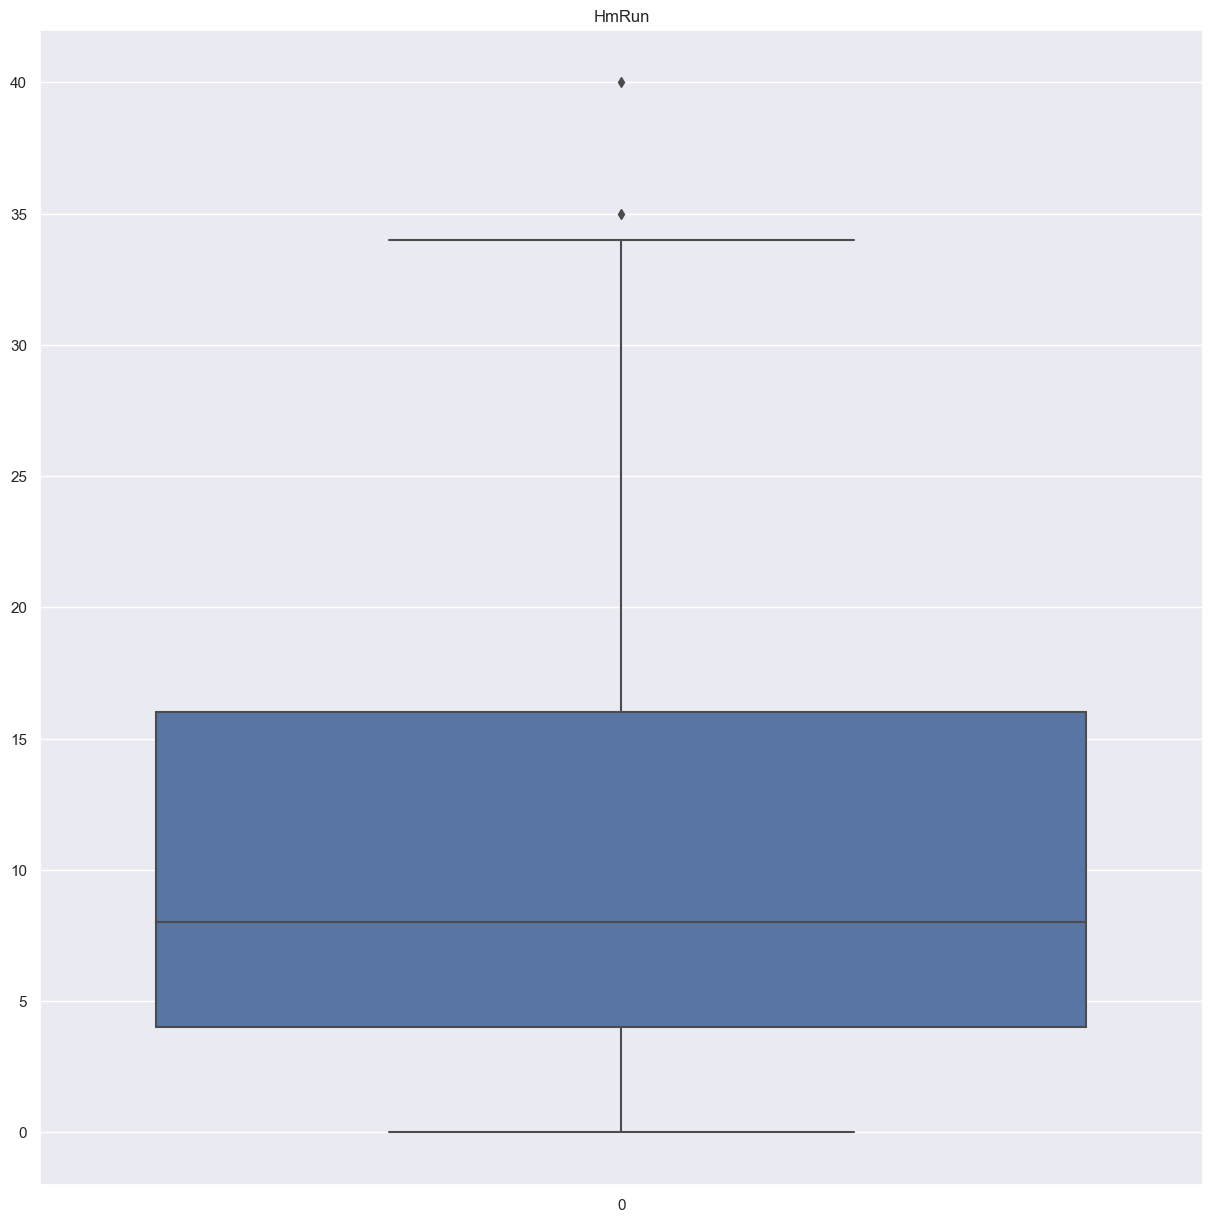

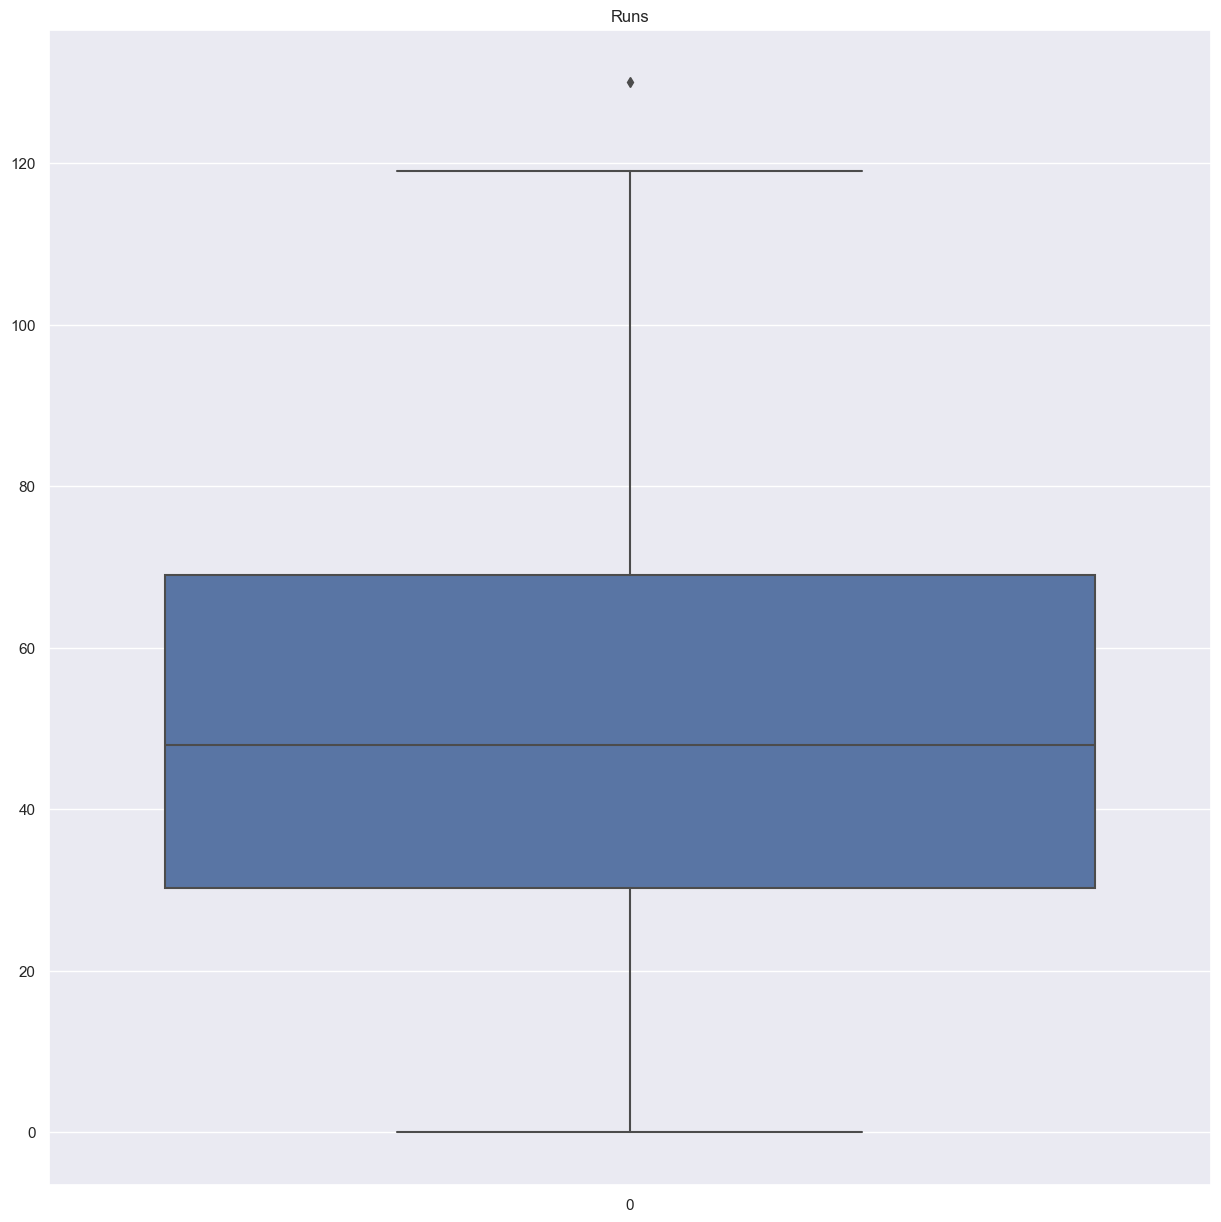

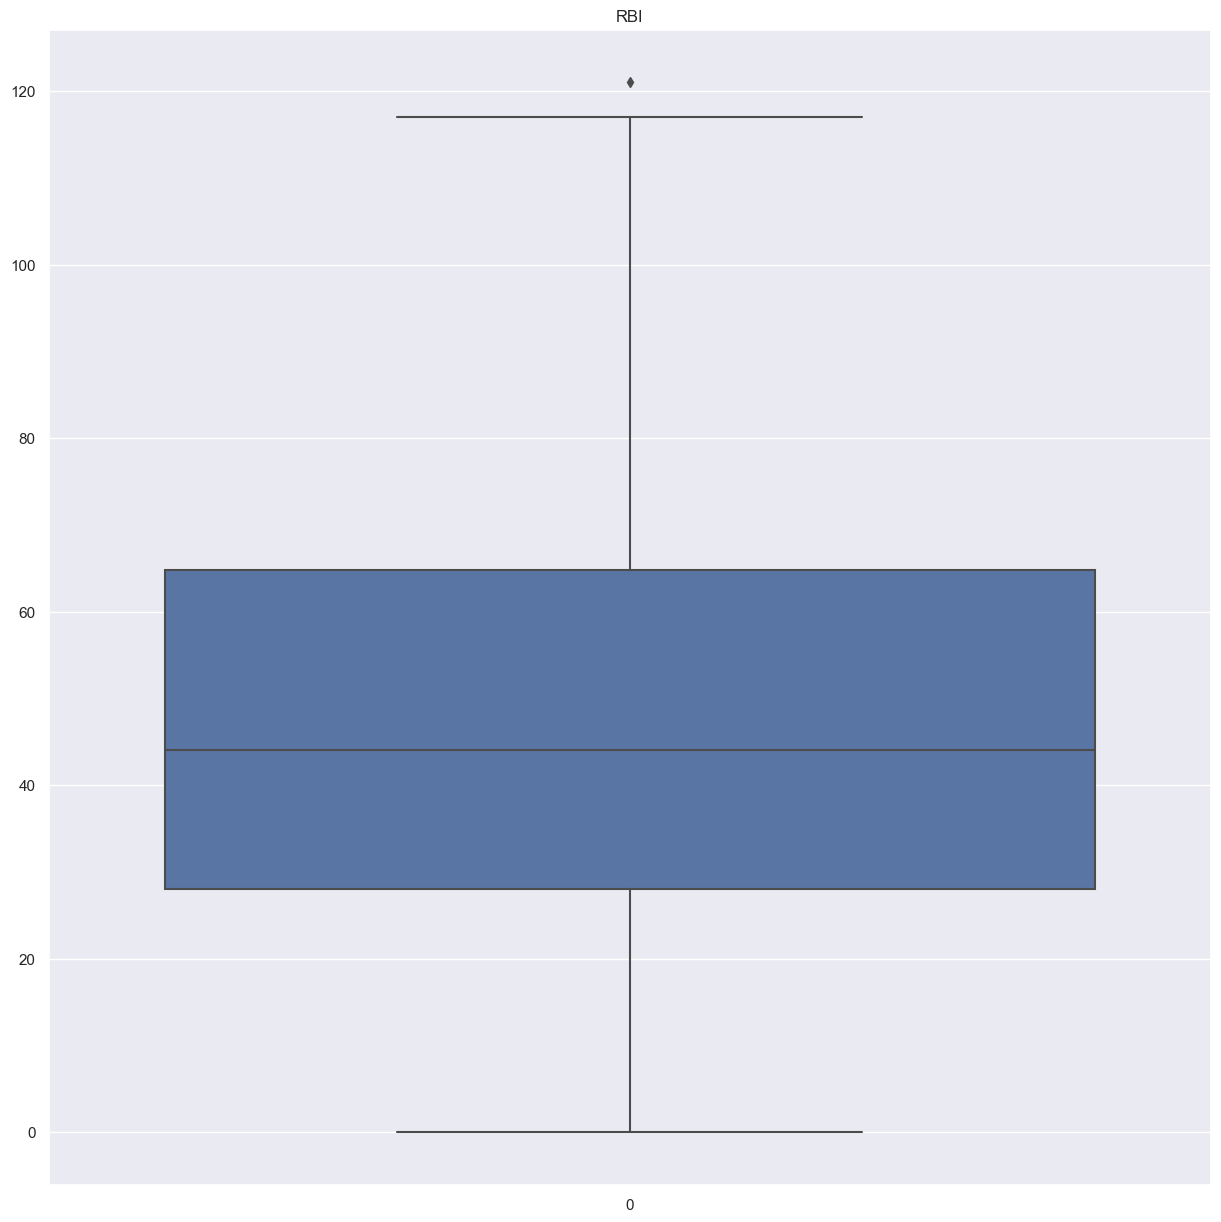

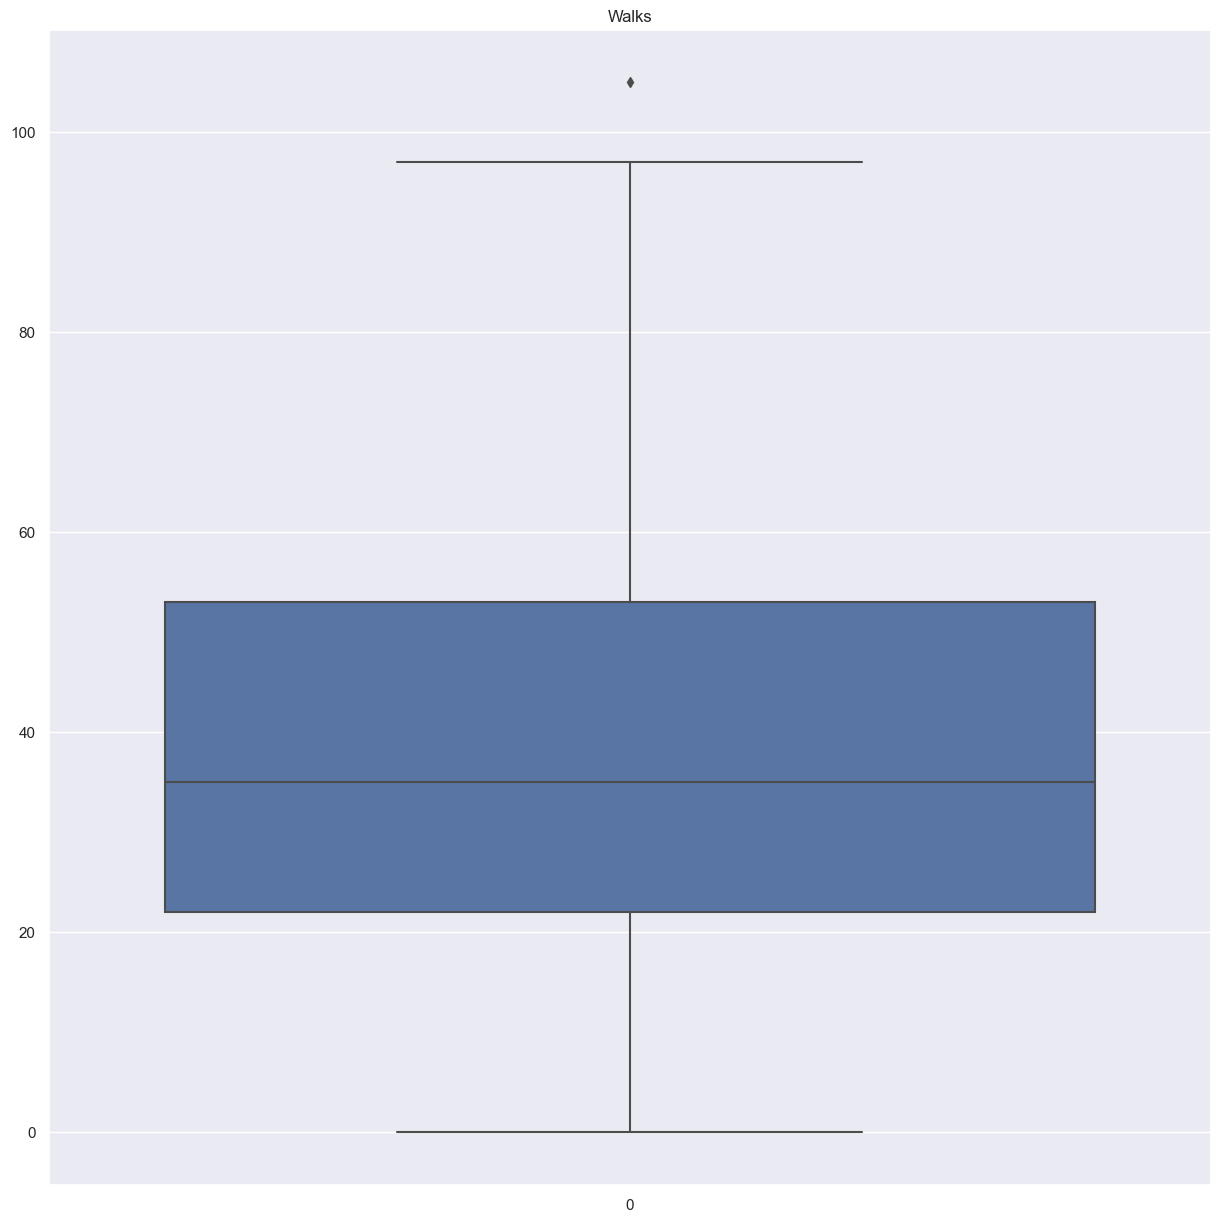

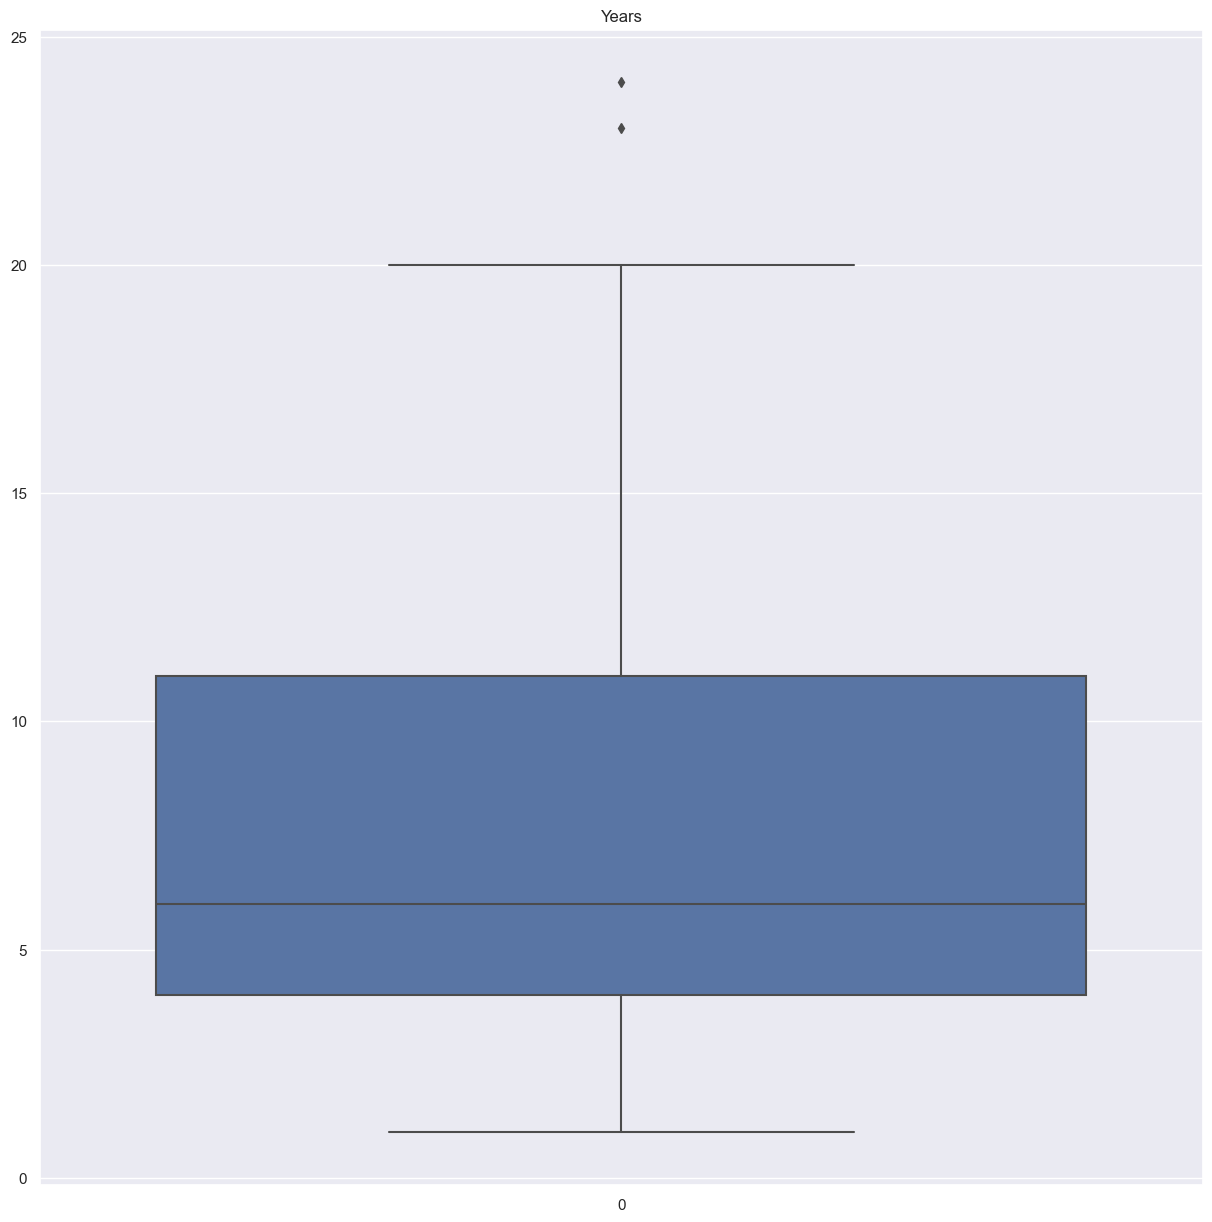

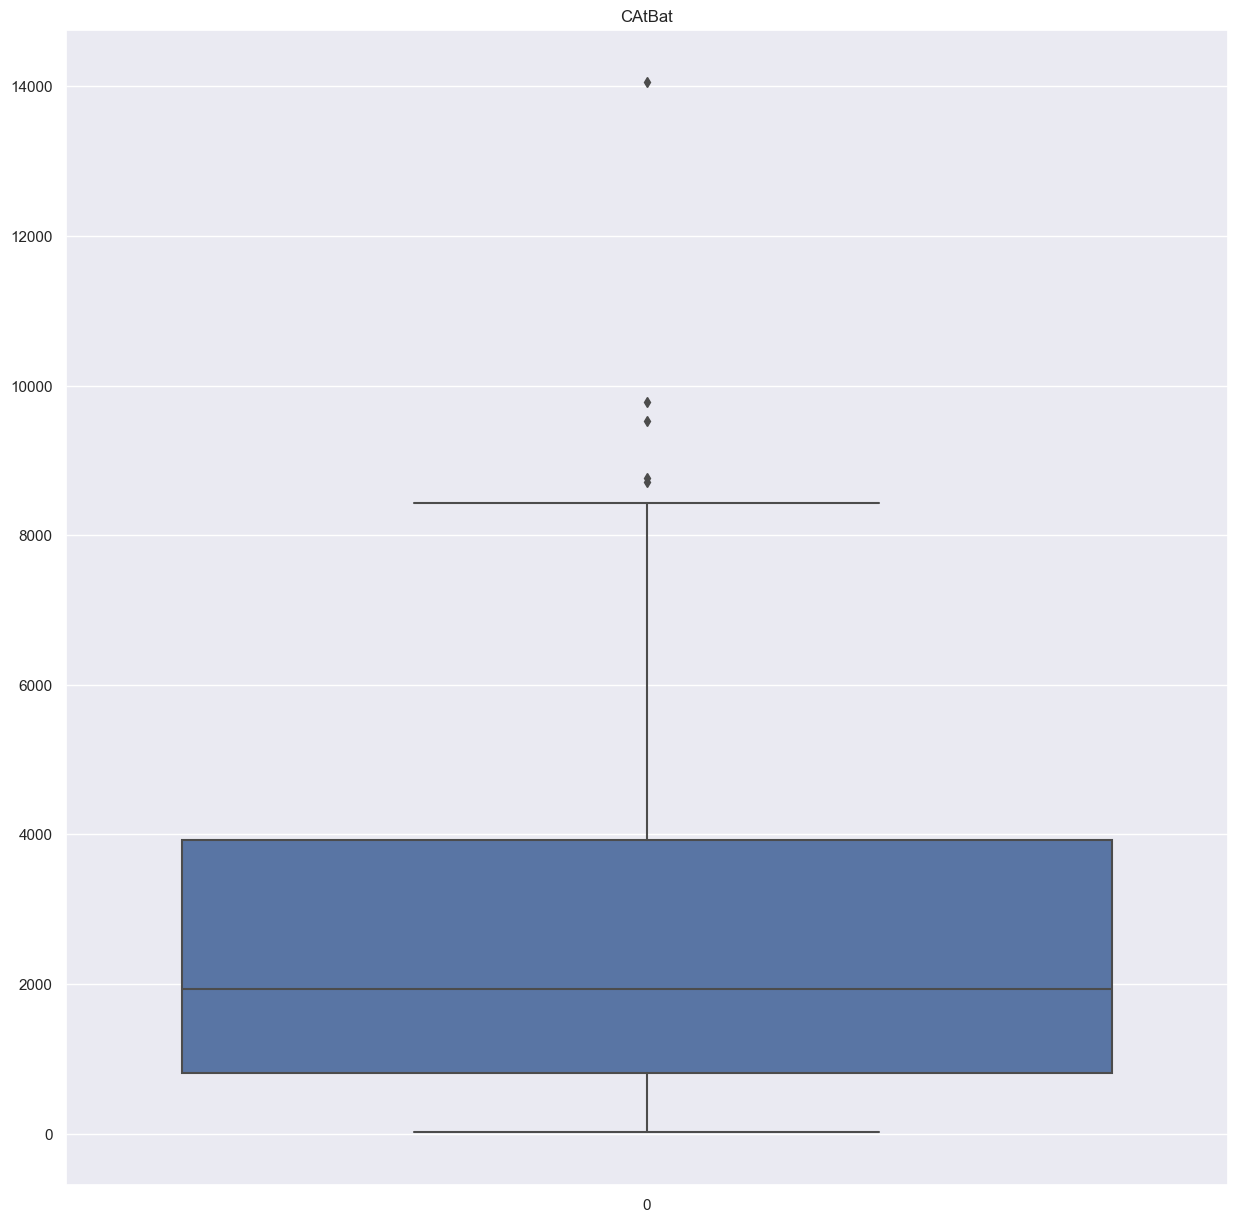

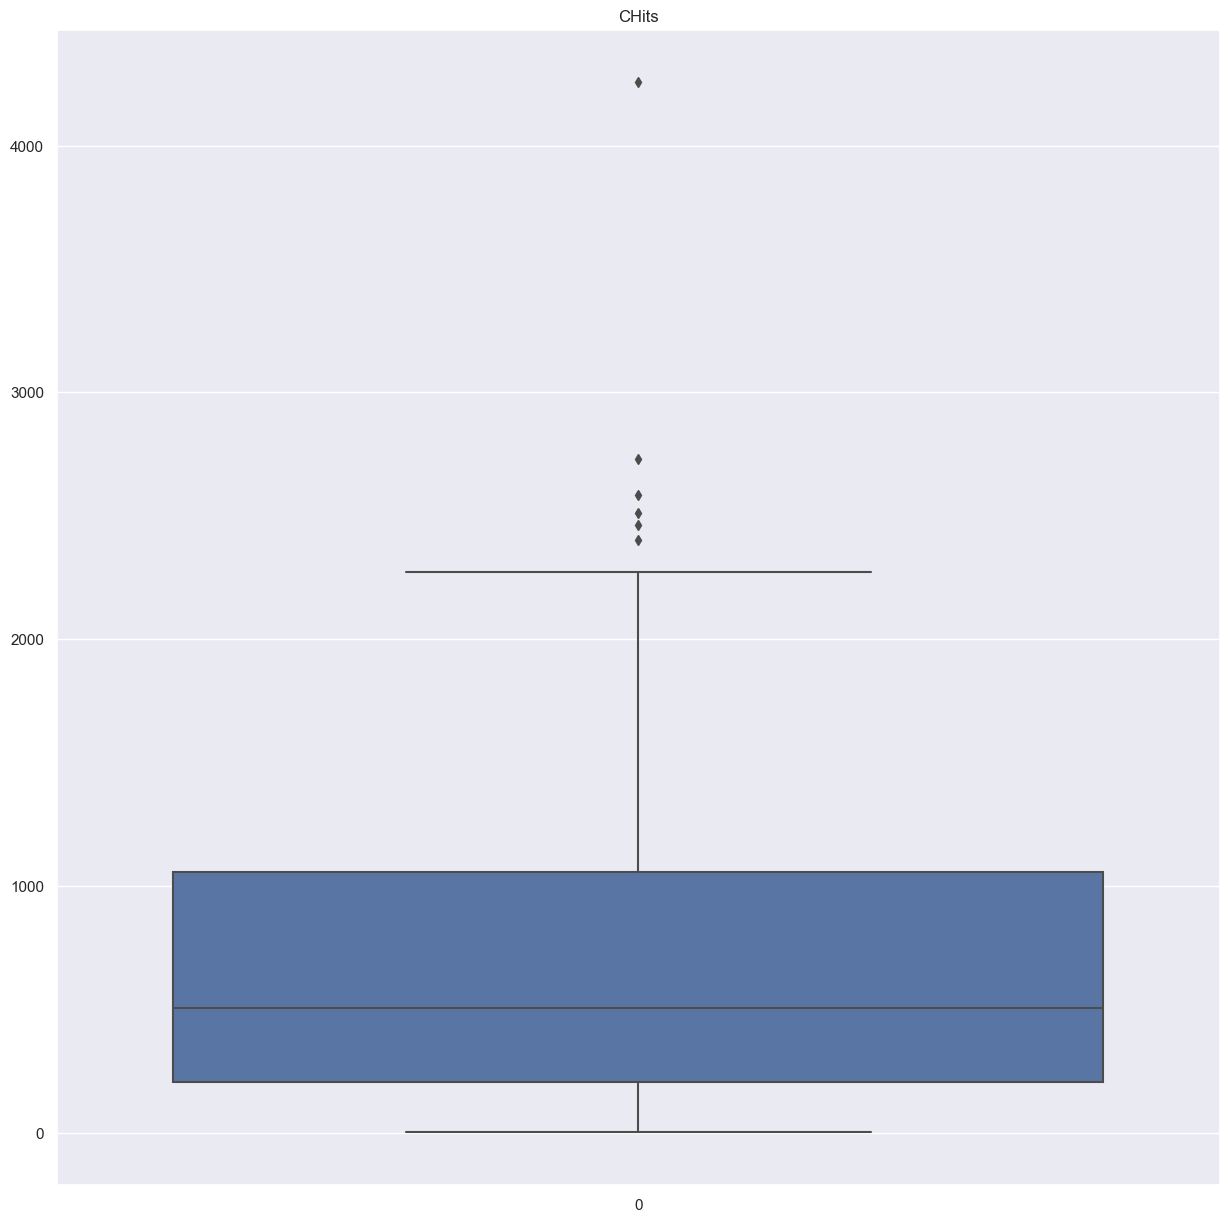

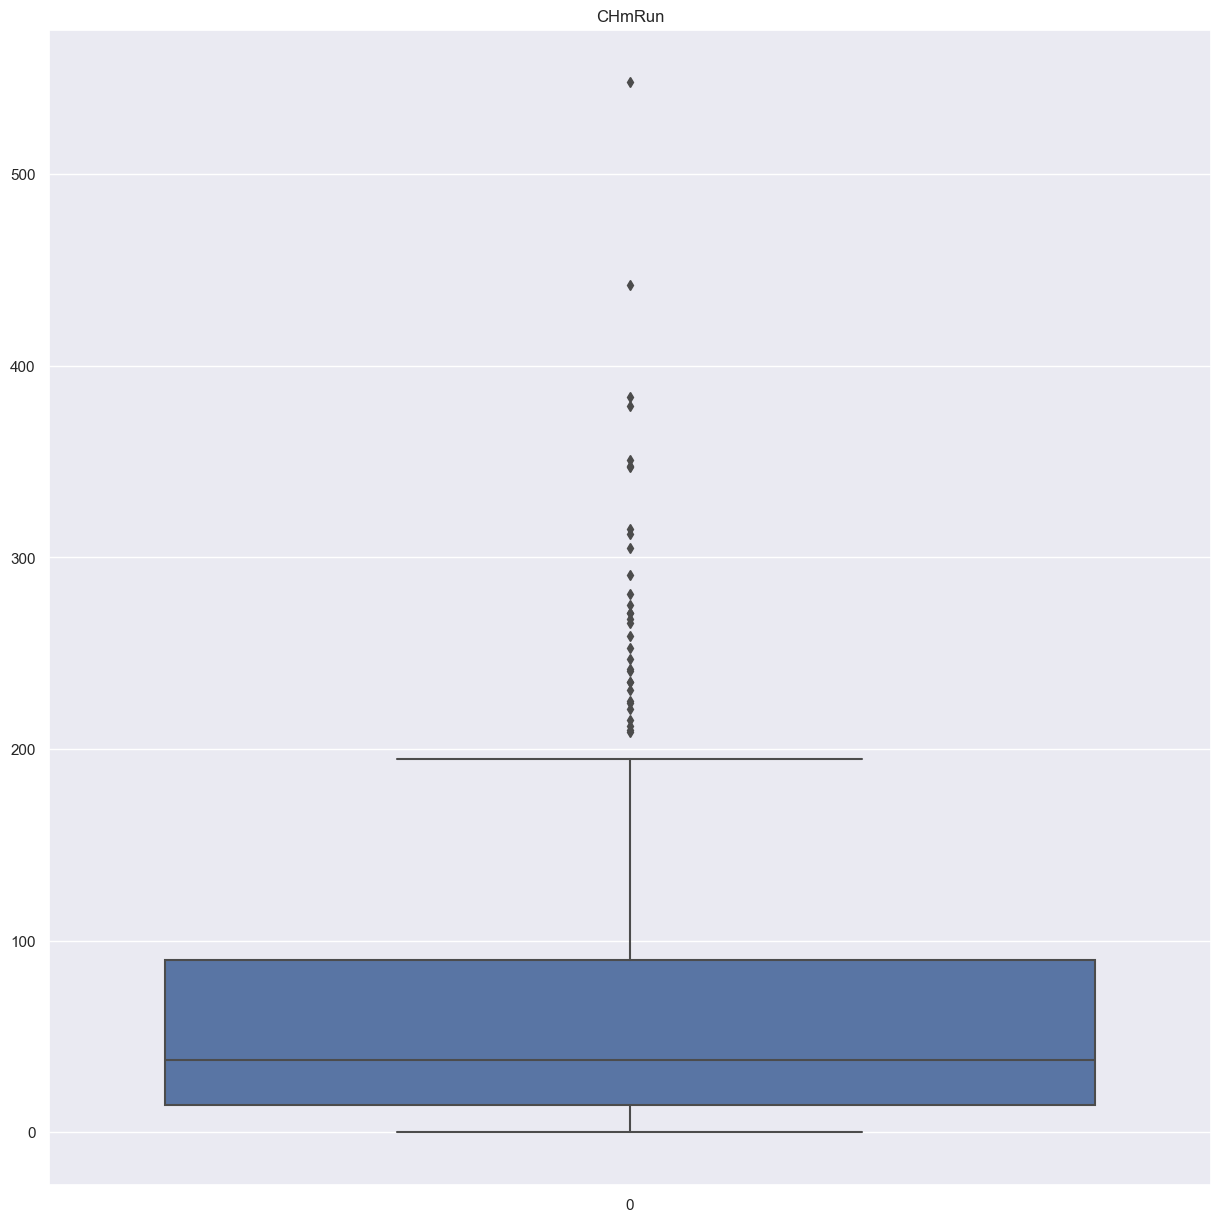

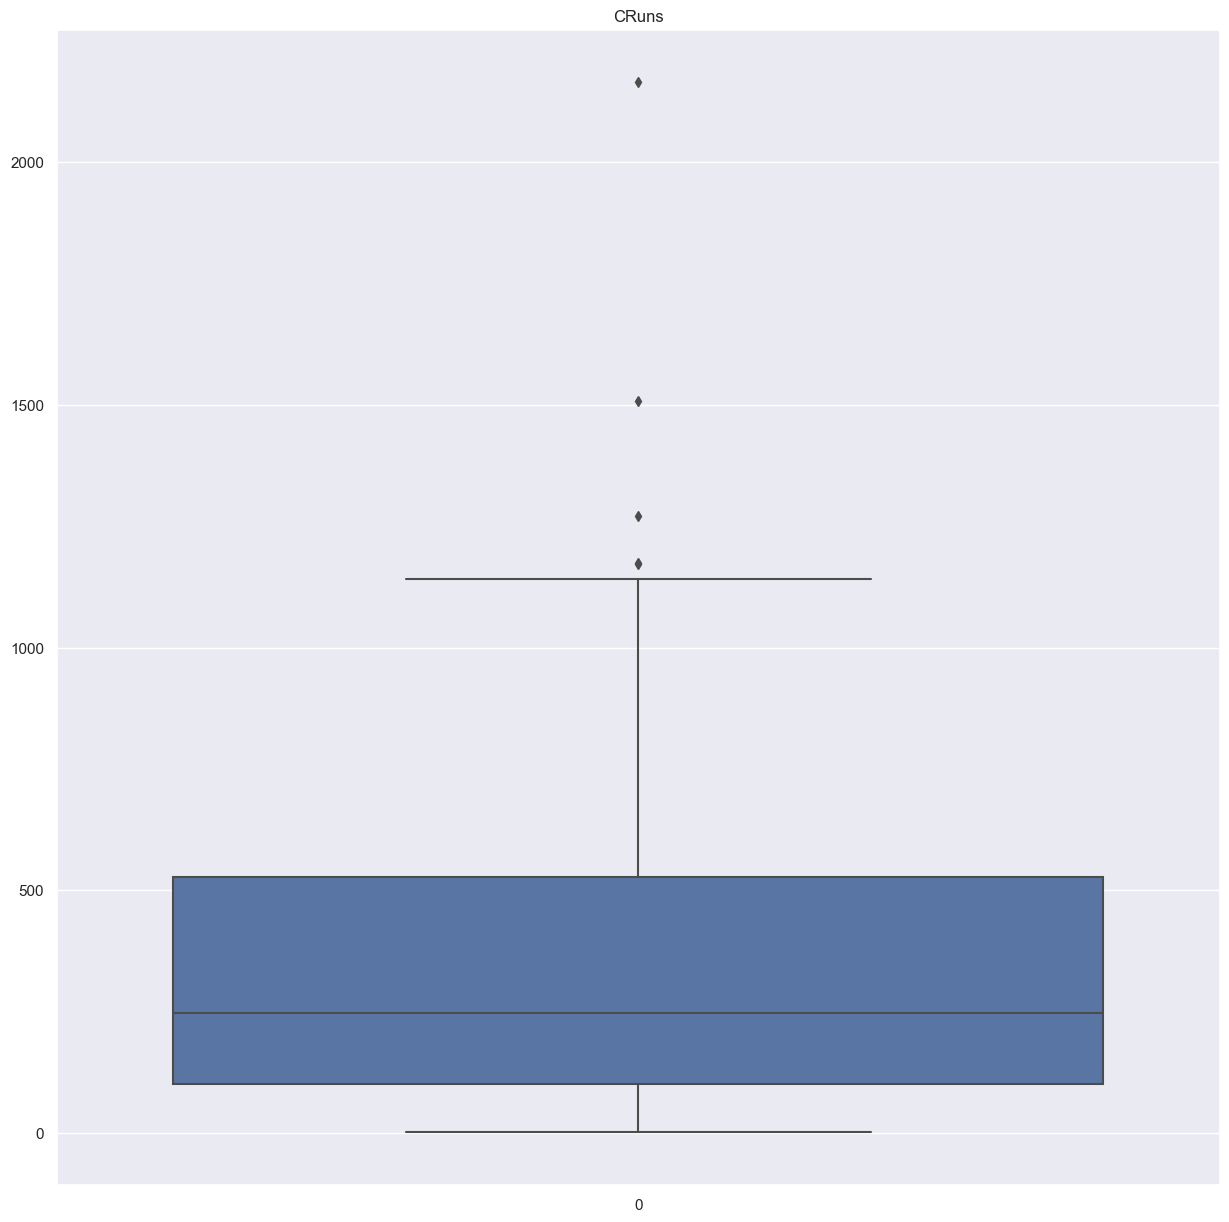

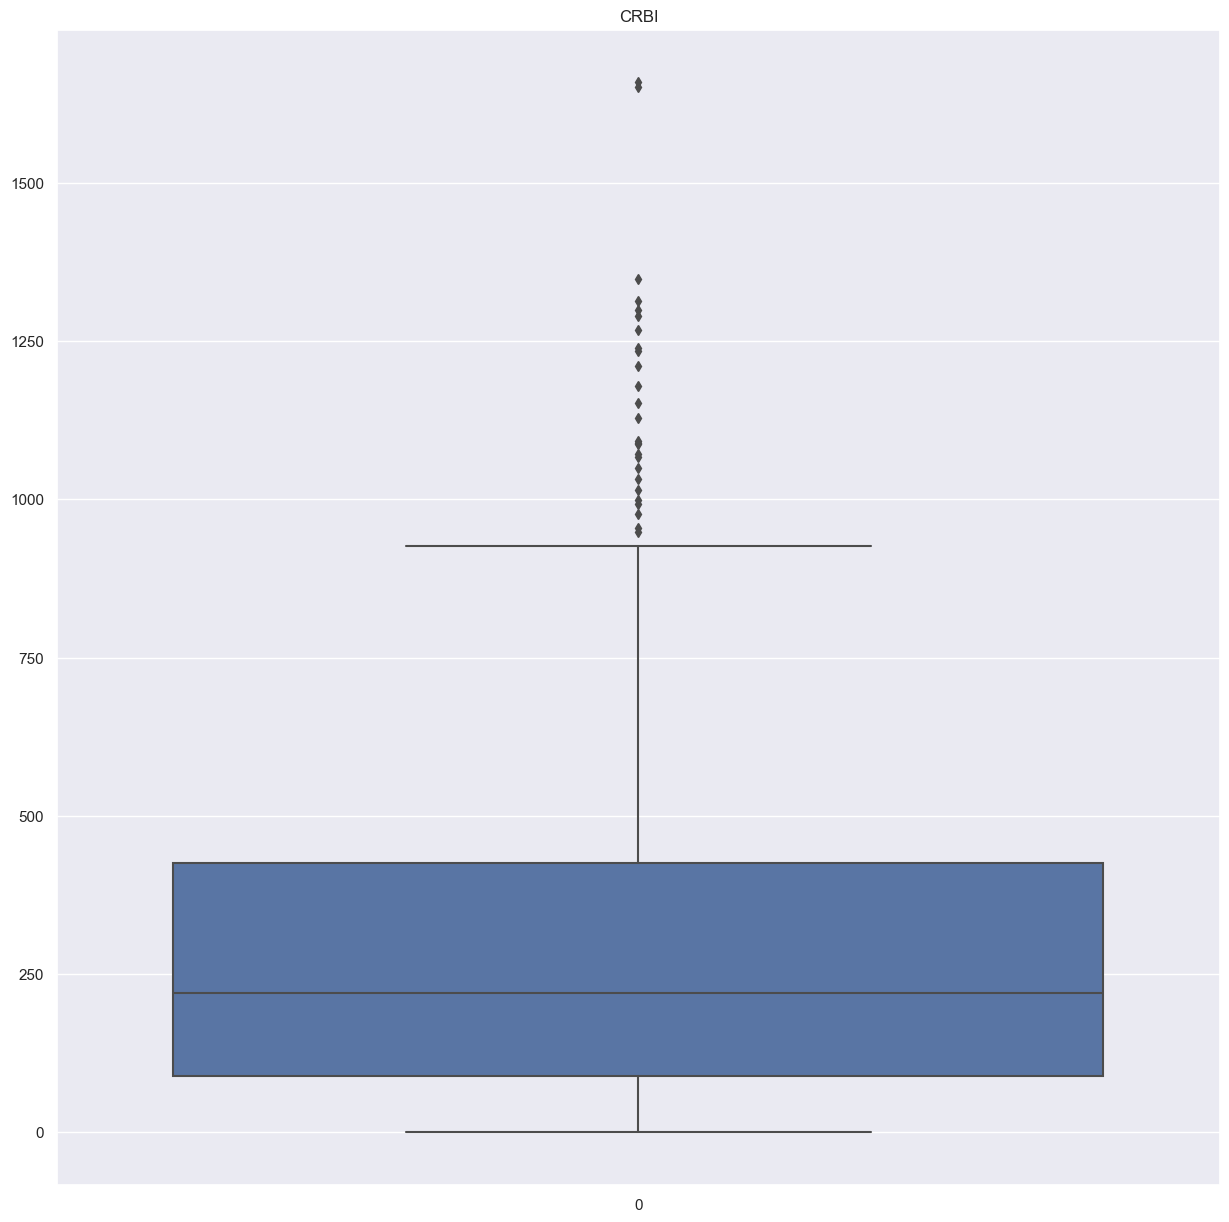

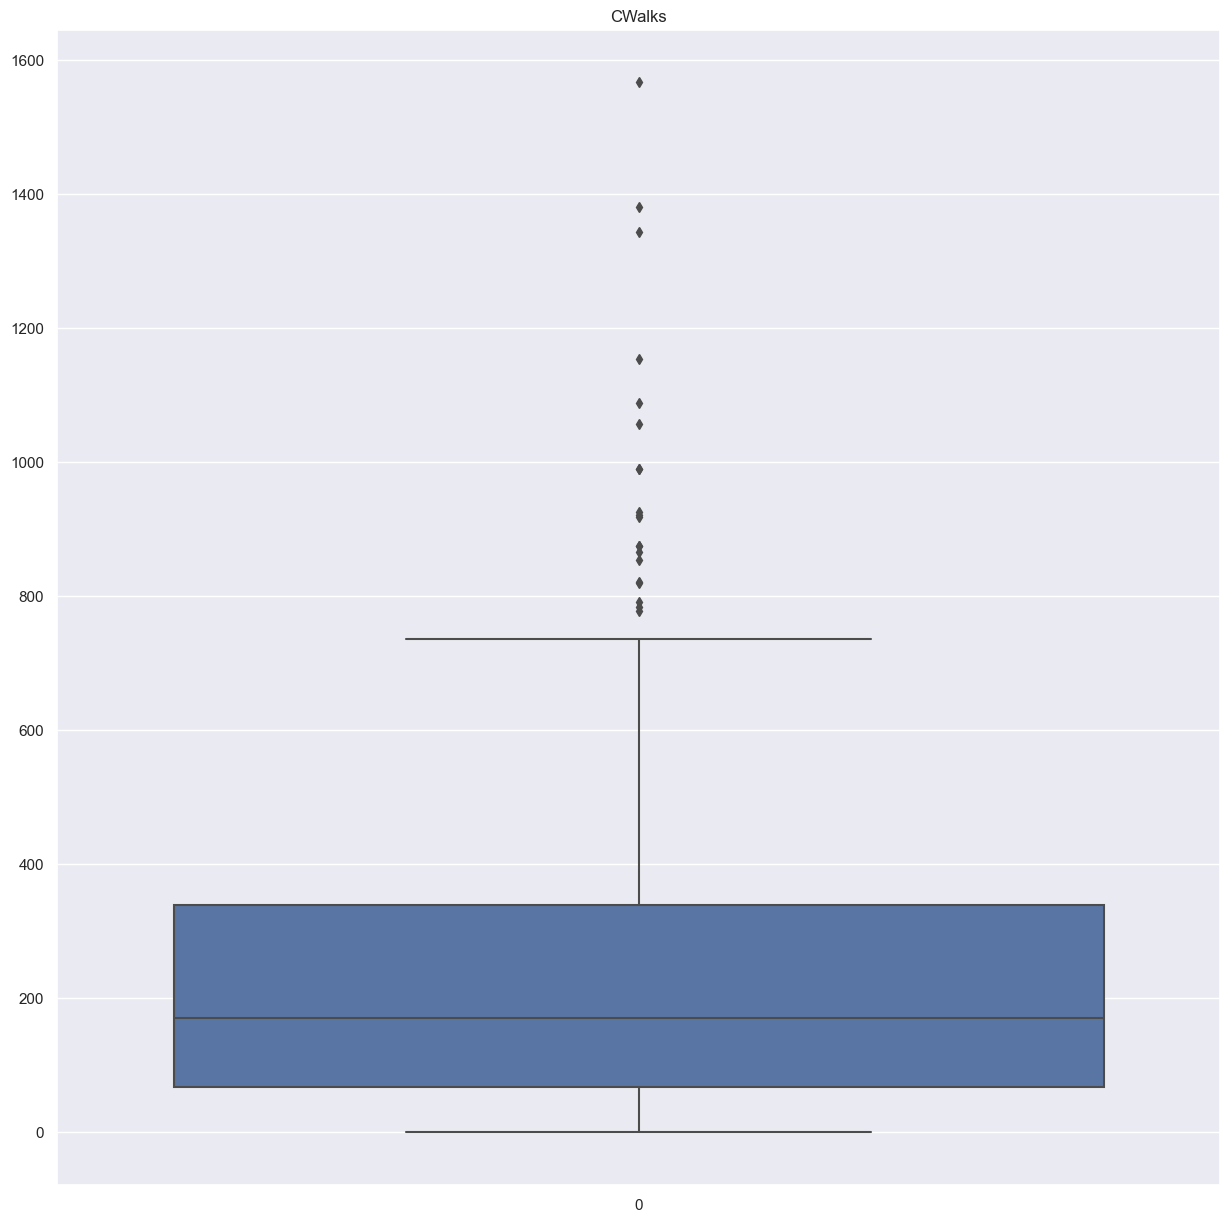

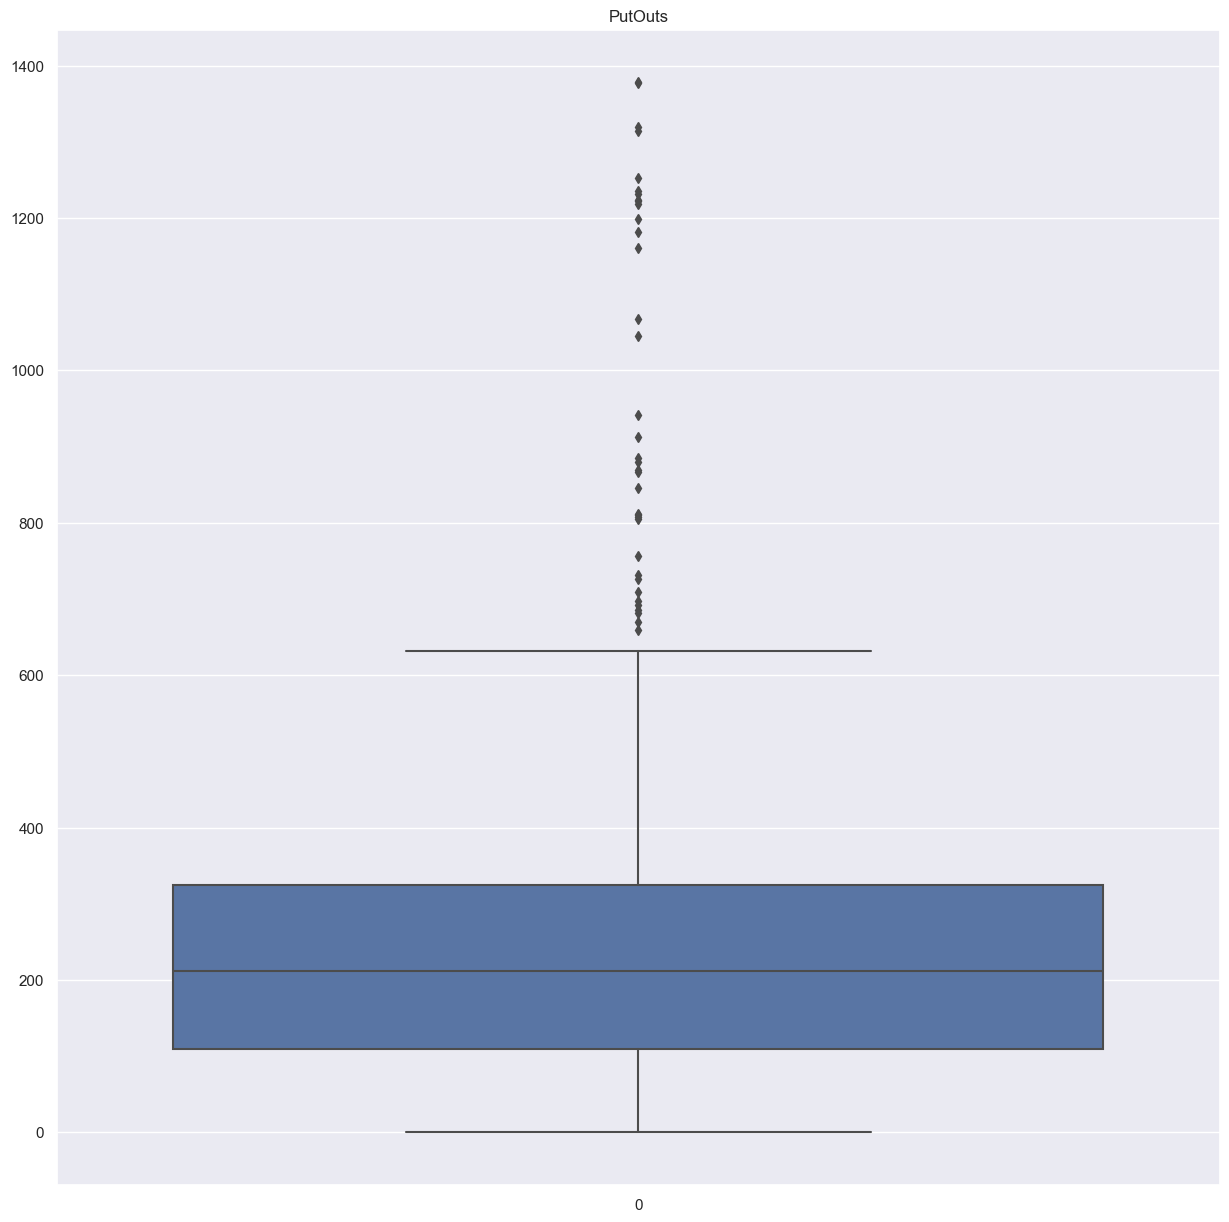

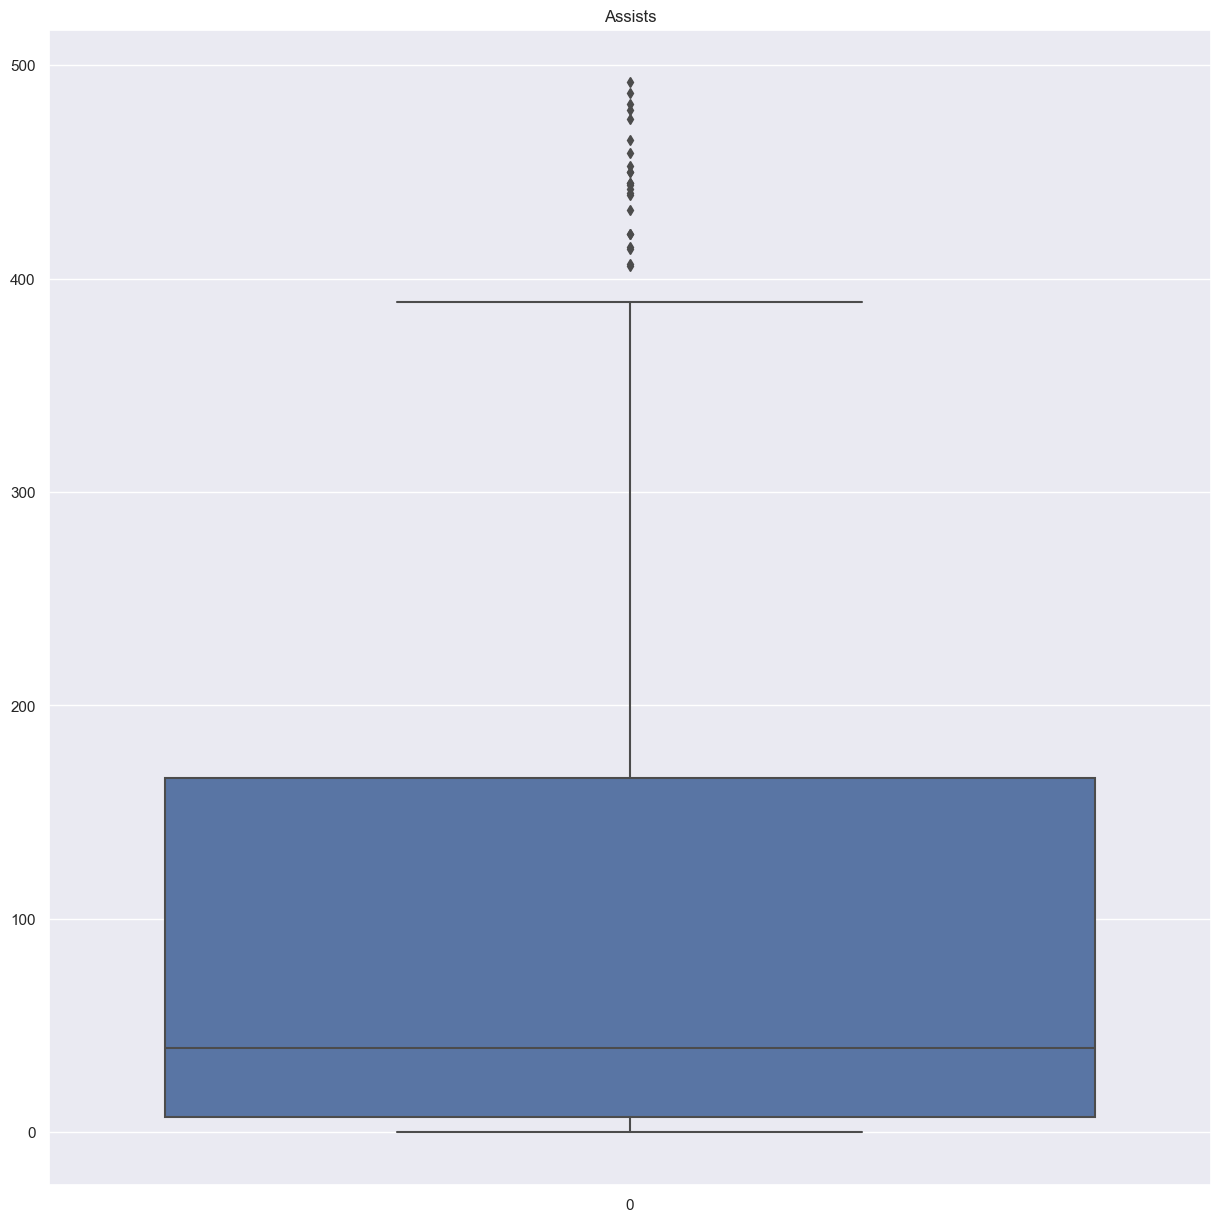

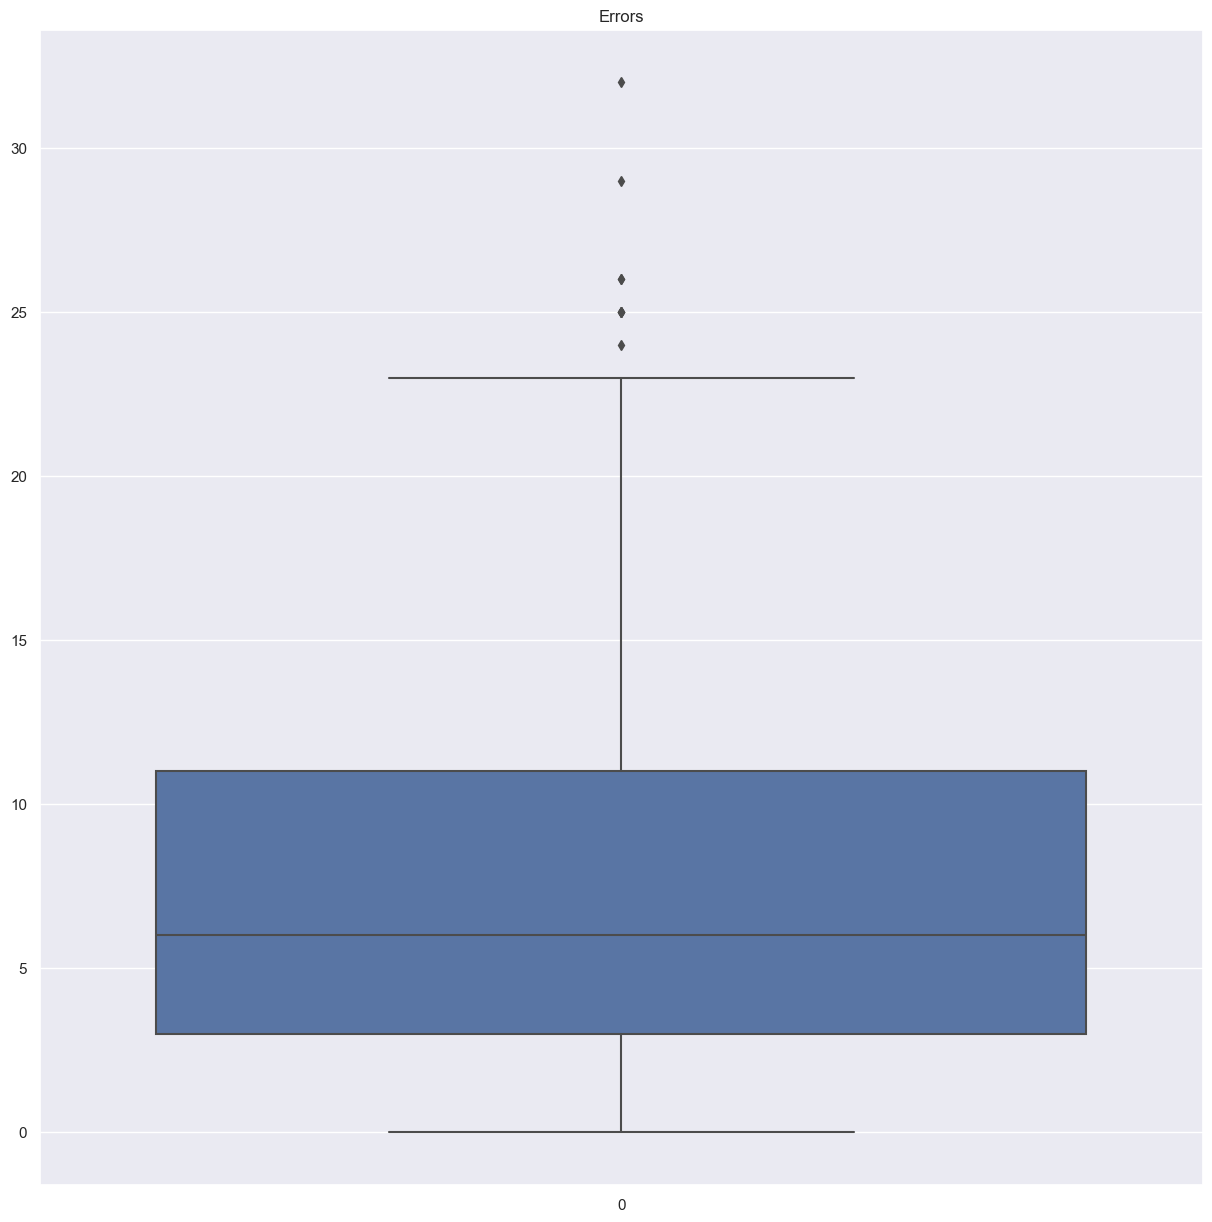

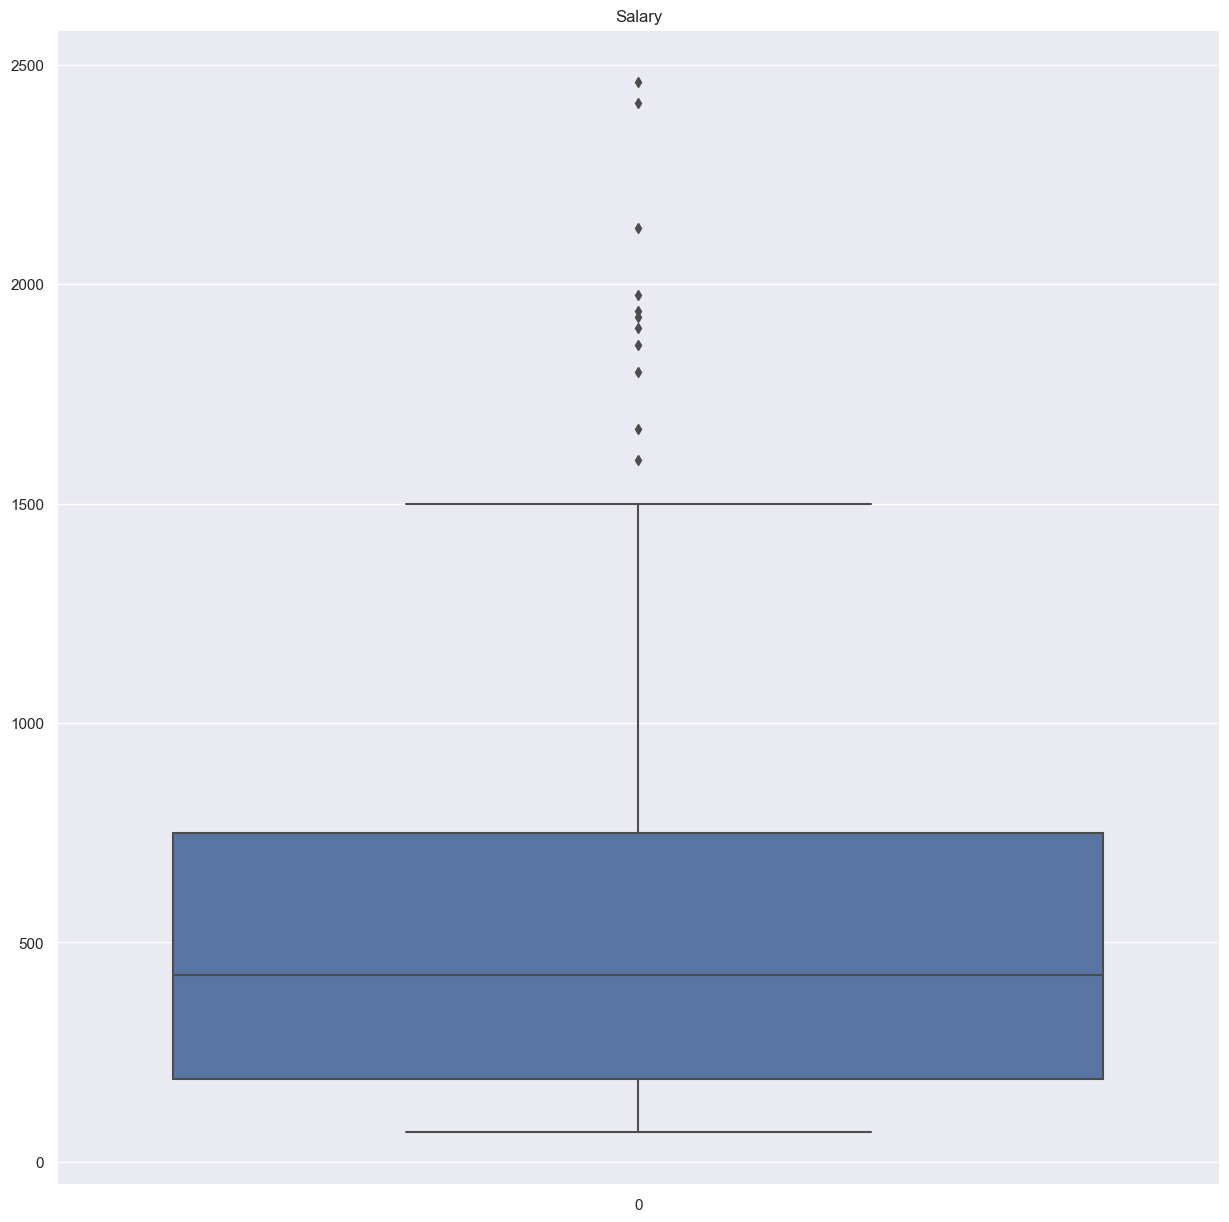

In [369]:
for col in num_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

In [370]:
for col in num_cols:
    outlier_count = count_outliers(df, col, q1=0.1, q3=0.9)
    print(col, ':', outlier_count)

AtBat : 0
Hits : 0
HmRun : 0
Runs : 0
RBI : 0
Walks : 0
Years : 0
CAtBat : 0
CHits : 1
CHmRun : 1
CRuns : 0
CRBI : 0
CWalks : 1
PutOuts : 0
Assists : 0
Errors : 0
Salary : 0


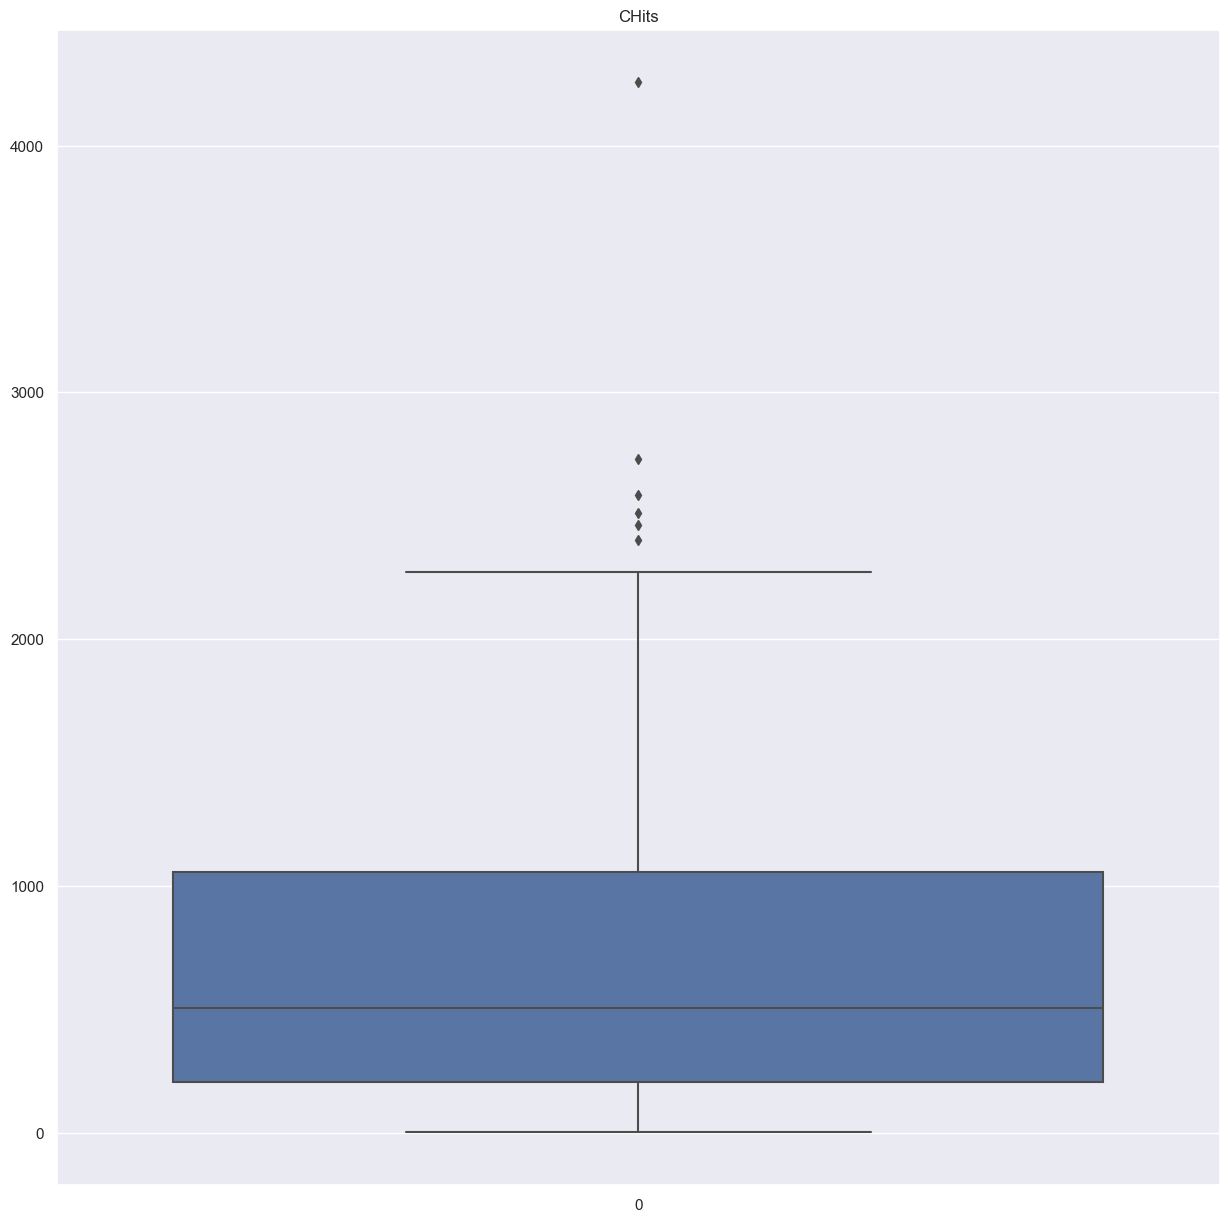

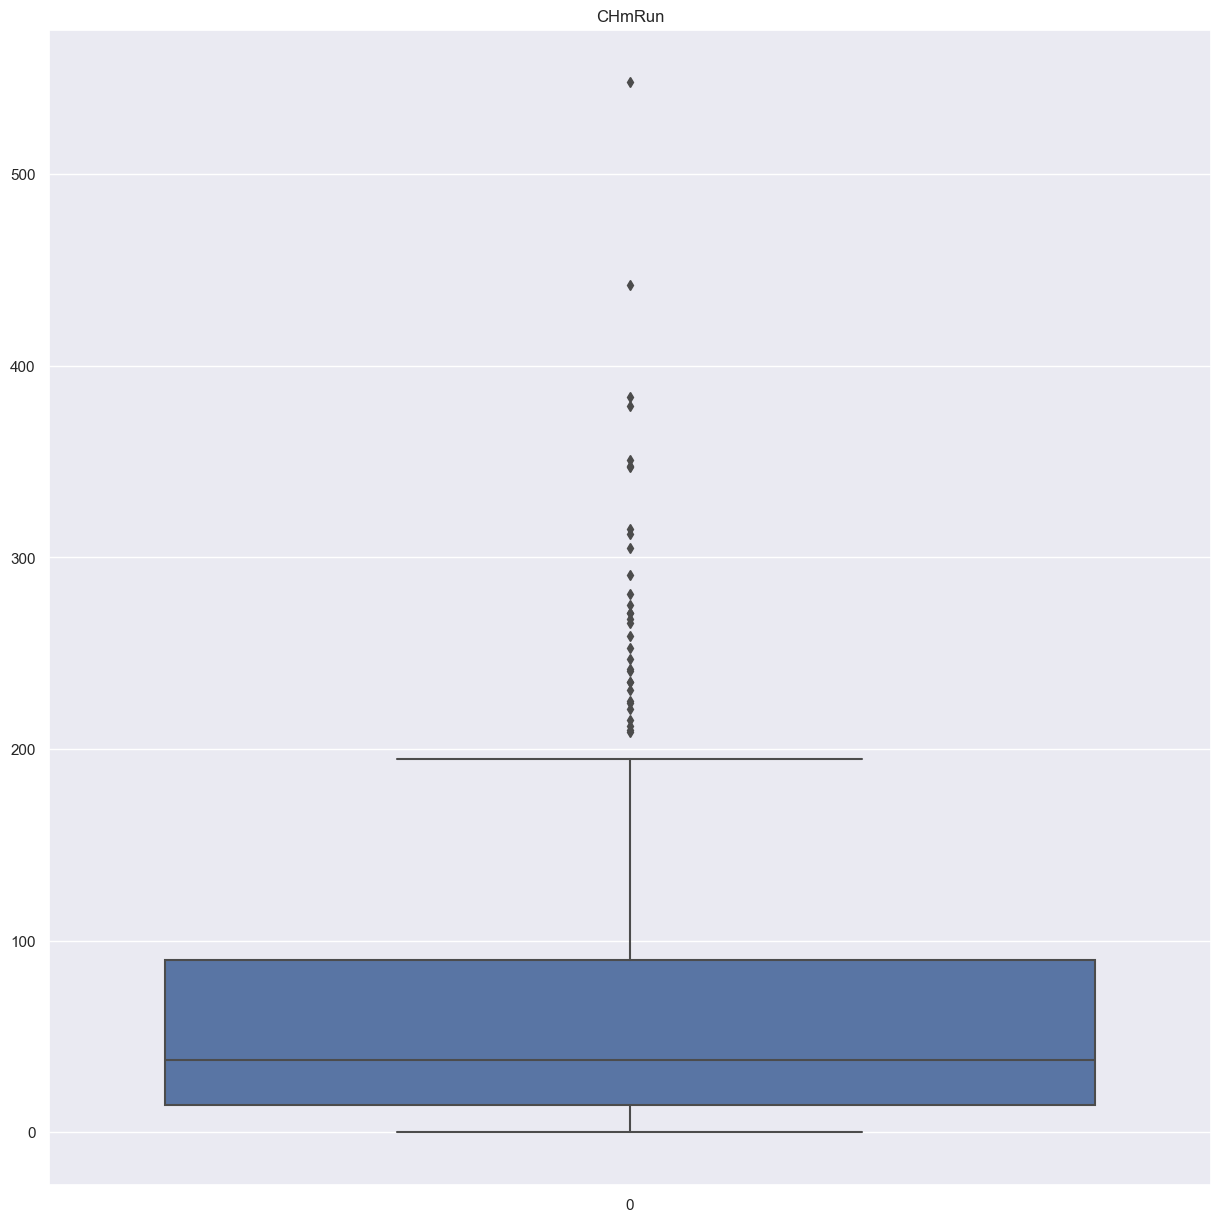

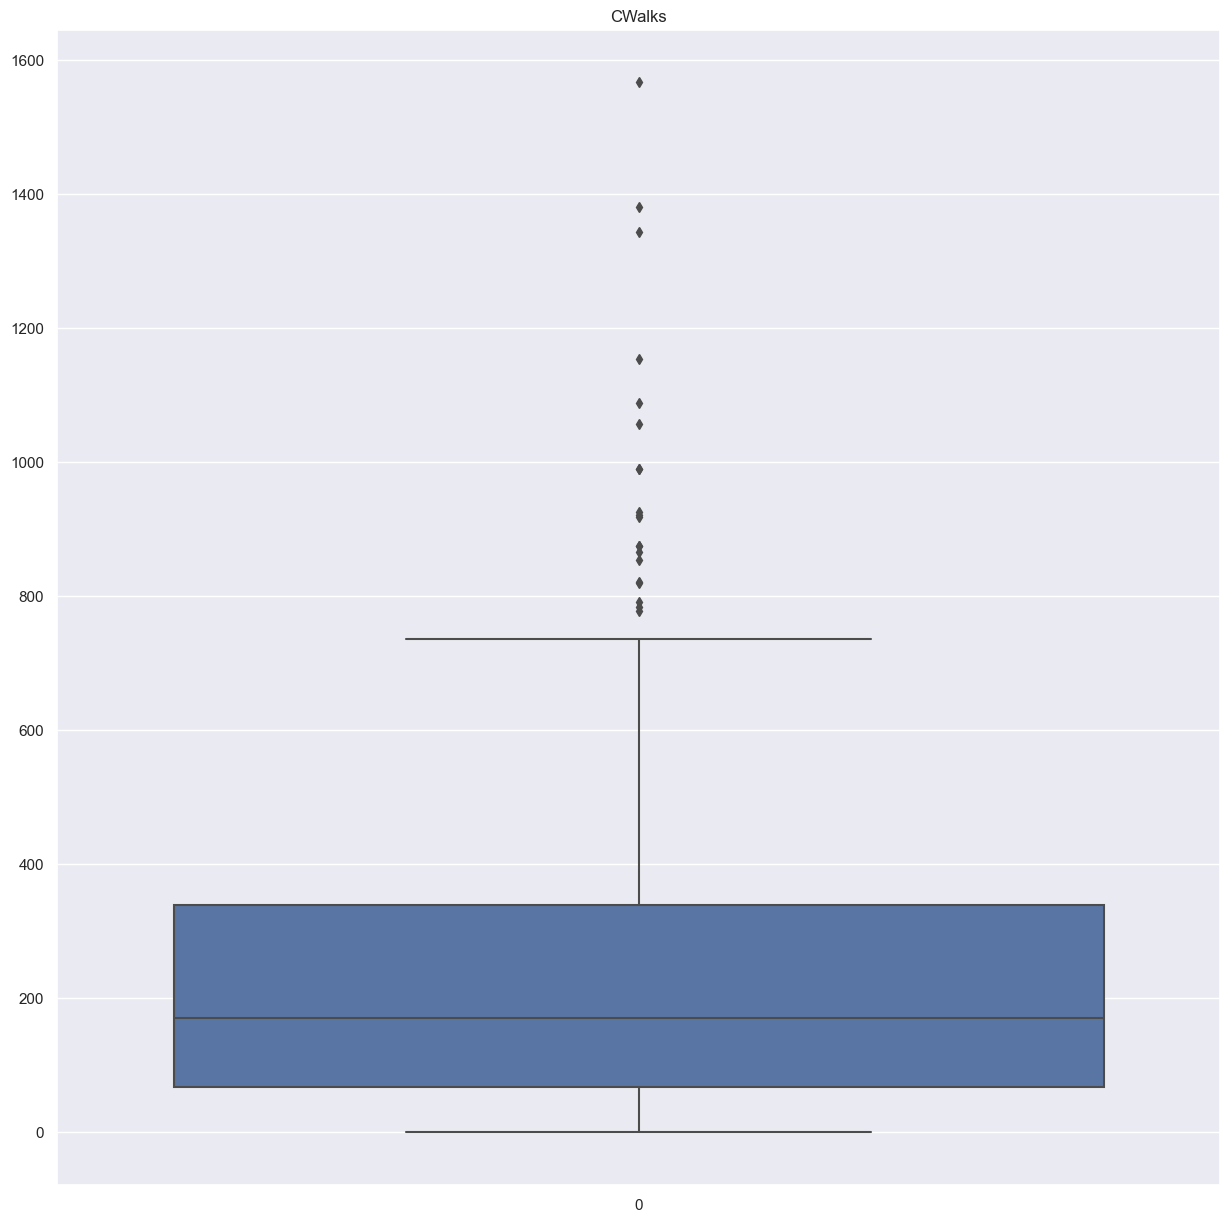

In [371]:
for col in num_cols:
    if check_outlier(df, col, q1=0.1, q3=0.9):
        plt.title(col)
        sns.boxplot(df[col])
        plt.show()

In [372]:
for col in num_cols:
    if check_outlier(df, col, q1=0.1, q3=0.9):
        replace_with_thresholds(df, col, q1=0.1, q3=0.9)

In [373]:
for col in num_cols:
    outlier_count = count_outliers(df, col, q1=0.1, q3=0.9)
    print(col, ':', outlier_count)

AtBat : 0
Hits : 0
HmRun : 0
Runs : 0
RBI : 0
Walks : 0
Years : 0
CAtBat : 0
CHits : 0
CHmRun : 0
CRuns : 0
CRBI : 0
CWalks : 0
PutOuts : 0
Assists : 0
Errors : 0
Salary : 0


### 2. Missing Values (Eksik Değerler)

In [374]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [375]:
missing_values_table(df)

        n_miss  ratio
Salary      59  18.32


- Since the missing values are in the target variable, we cannot use the simple assignment method, variable breakdown value assignment and predictive value assignment methods. We will perform direct deletion. (Eksik değerler hedef değişkeninde olduğu için basit atama yöntemi, değişken kırılımına değer atama ve tahmine dayalı değer atama yöntemlerini kullanamıyoruz. Direkt silme işlemi uygulayacağız.)

In [376]:
df = df.dropna()

In [377]:
df.isnull().sum().any()

False

### Examination of Categorical Variables (Kategorik Değişkenlerin İncelenmesi)

In [378]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


        League  Ratio
League               
A          139  52.85
N          124  47.15
##########################################


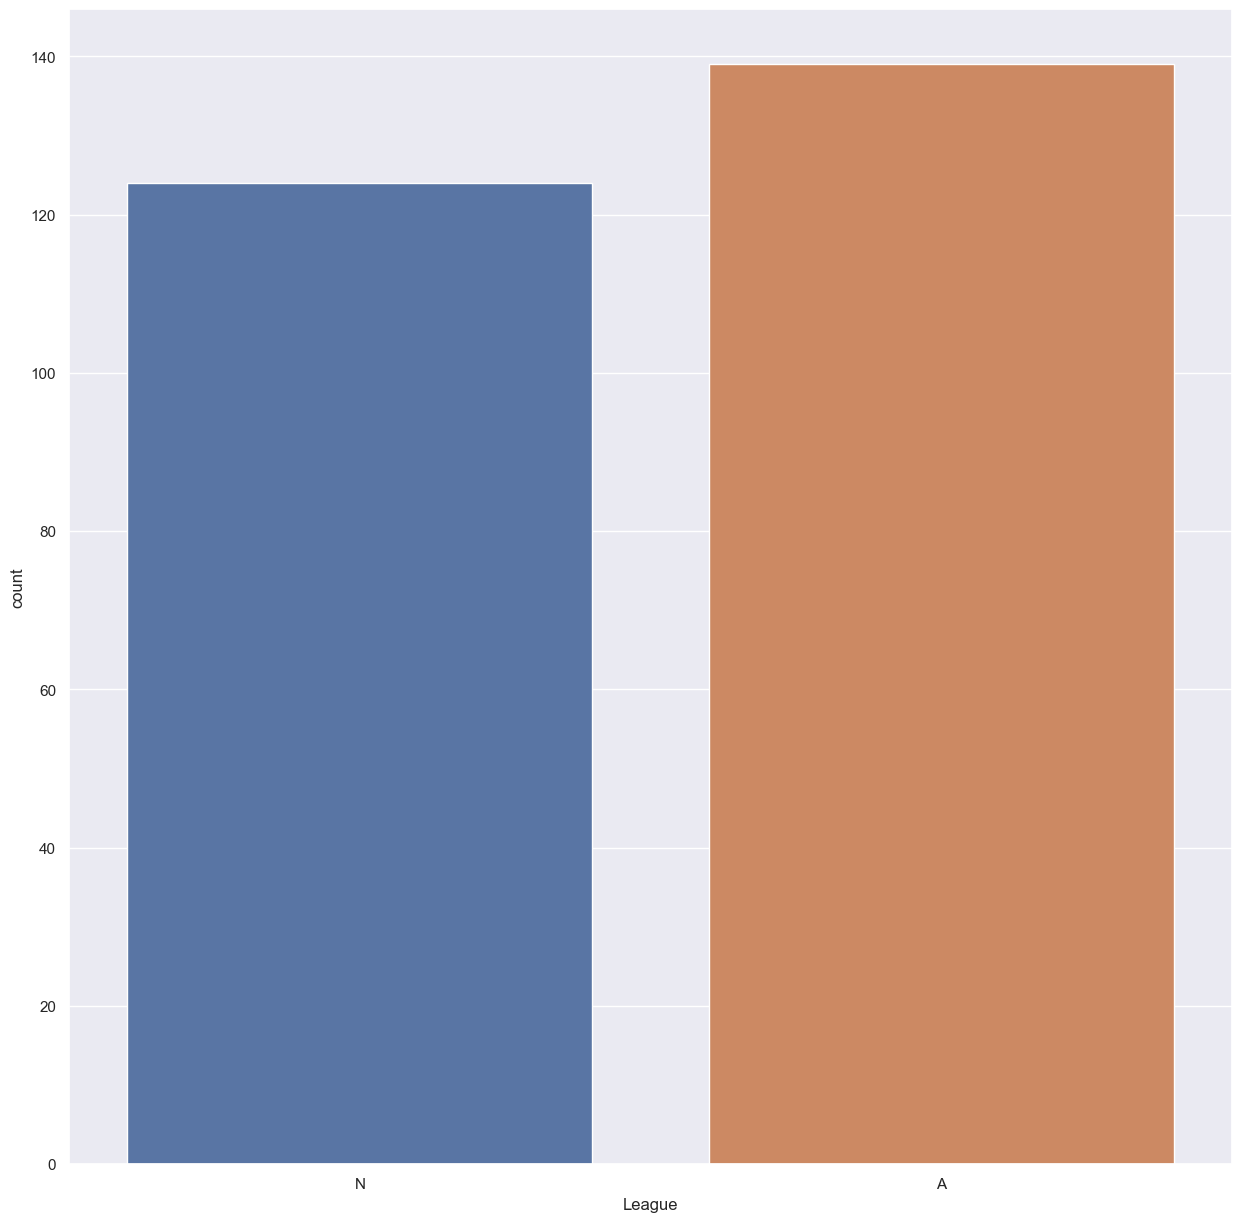

          Division  Ratio
Division                 
W              134  50.95
E              129  49.05
##########################################


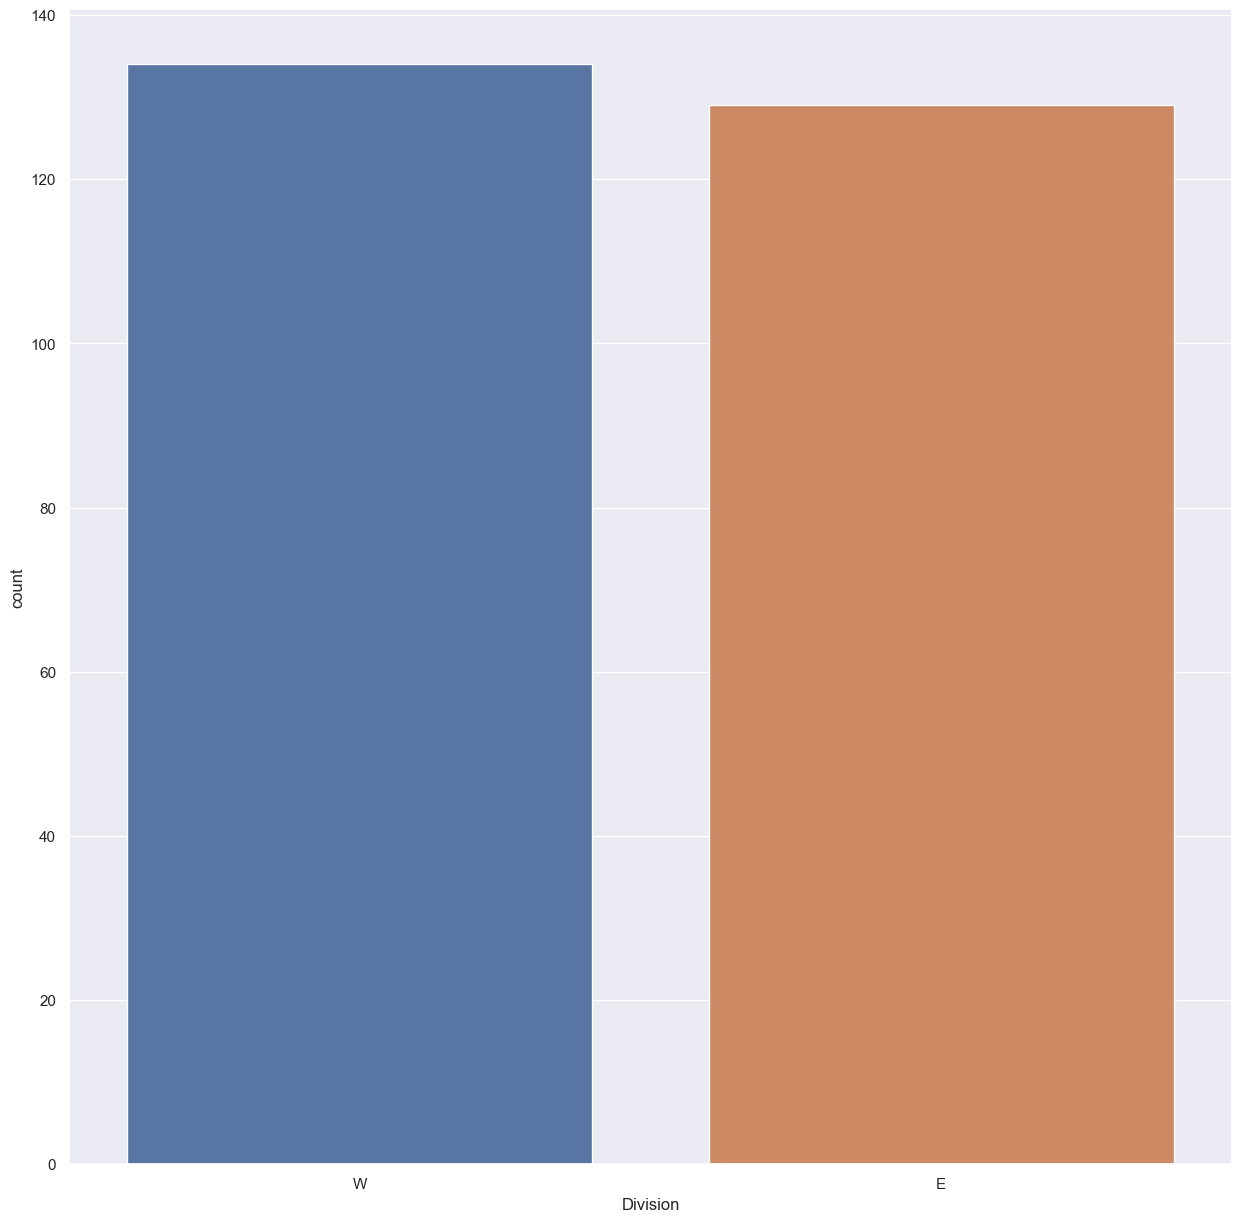

           NewLeague  Ratio
NewLeague                  
A                141  53.61
N                122  46.39
##########################################


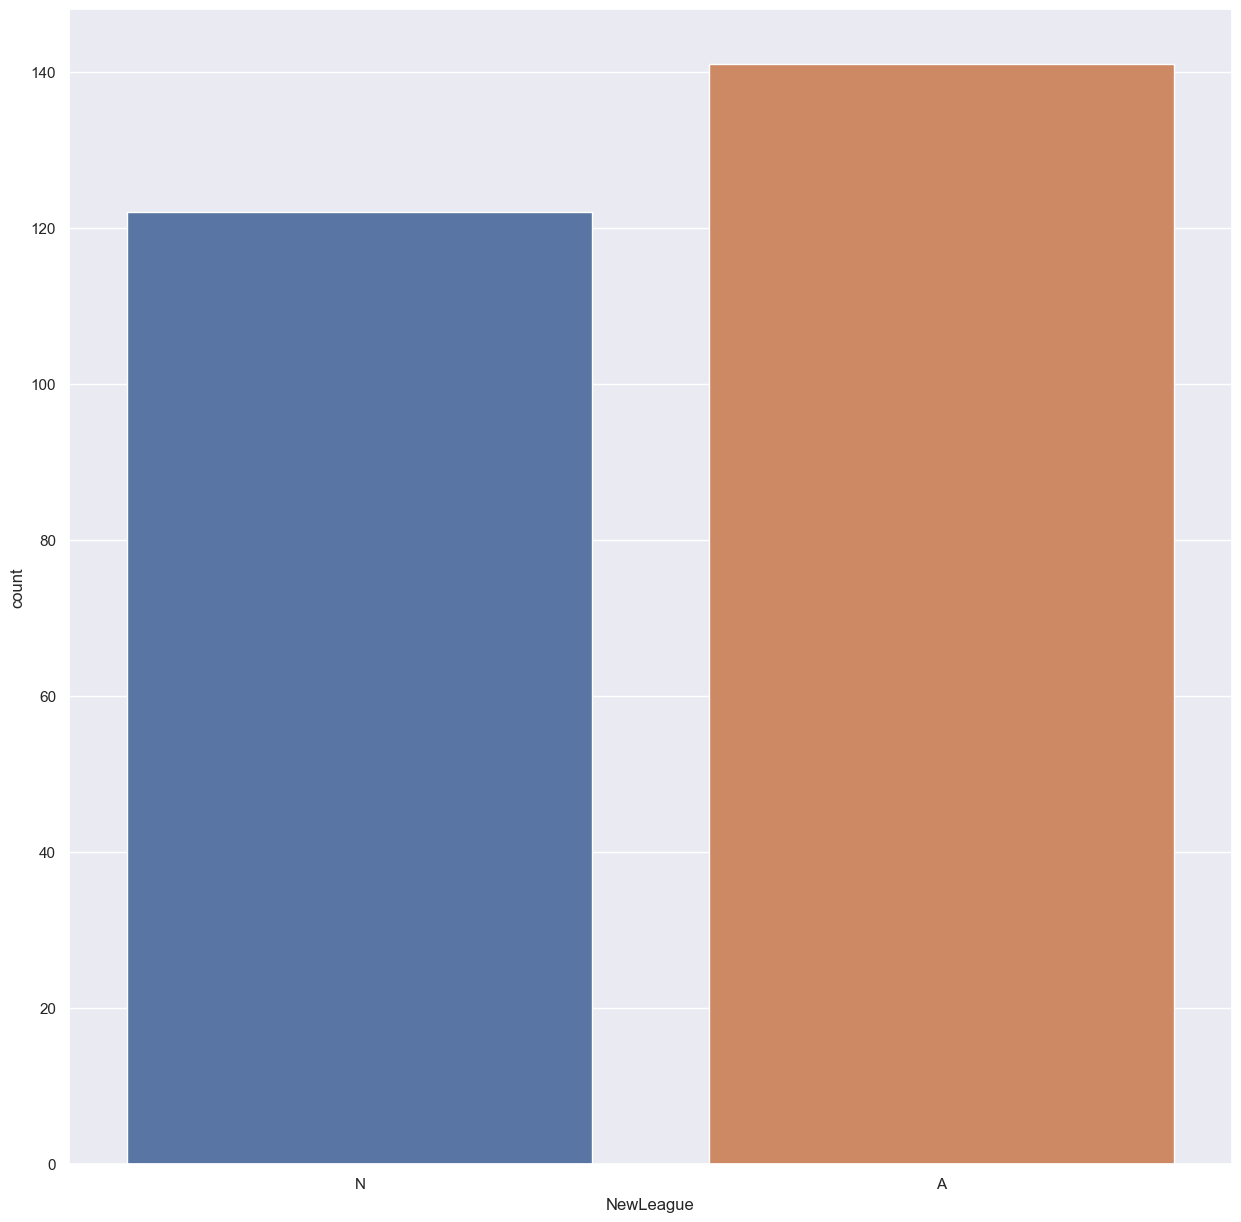

In [379]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

### Examining Categorical Variables with Target (Kategorik Değişkenlerin Target ile İncelenmesi)

In [380]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [381]:
for col in cat_cols:
    target_summary_with_cat(df, 'Salary', col)

        TARGET_MEAN
League             
A            542.00
N            529.12


          TARGET_MEAN
Division             
E              624.27
W              450.88


           TARGET_MEAN
NewLeague             
A               537.11
N               534.55




### Analysis of numerical Variables (Sayısal Değişkenlerin Analizi)

In [382]:
def num_summary(dataframe, numerical_col, plot=True):
    print("----------------------------------------------")
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    print("----------------------------------------------")
    
    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(f"{numerical_col} -- Histogram Graphic")
        plt.show()

----------------------------------------------
count   263.00
mean    403.64
std     147.31
min      19.00
5%      181.30
10%     205.60
20%     257.40
30%     311.60
40%     350.40
50%     413.00
60%     464.40
70%     508.20
80%     554.60
90%     591.00
99%     668.32
max     687.00
Name: AtBat, dtype: float64
----------------------------------------------


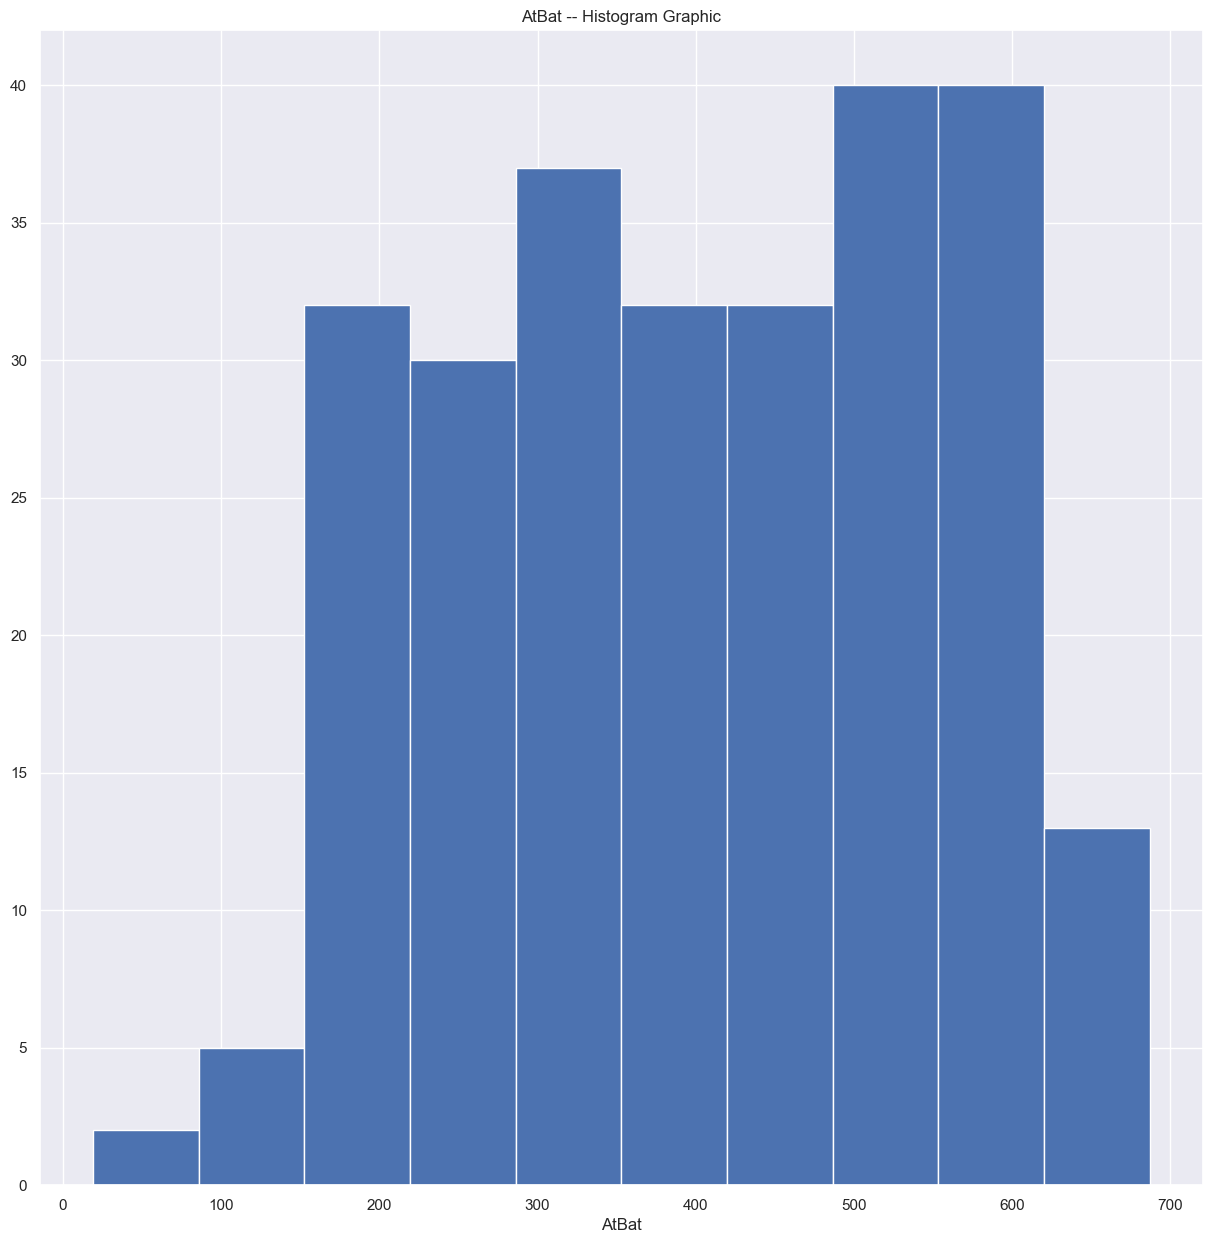

----------------------------------------------
count   263.00
mean    107.83
std      45.13
min       1.00
5%       42.10
10%      52.00
20%      66.80
30%      77.00
40%      92.00
50%     103.00
60%     120.00
70%     136.00
80%     148.60
90%     168.00
99%     211.76
max     238.00
Name: Hits, dtype: float64
----------------------------------------------


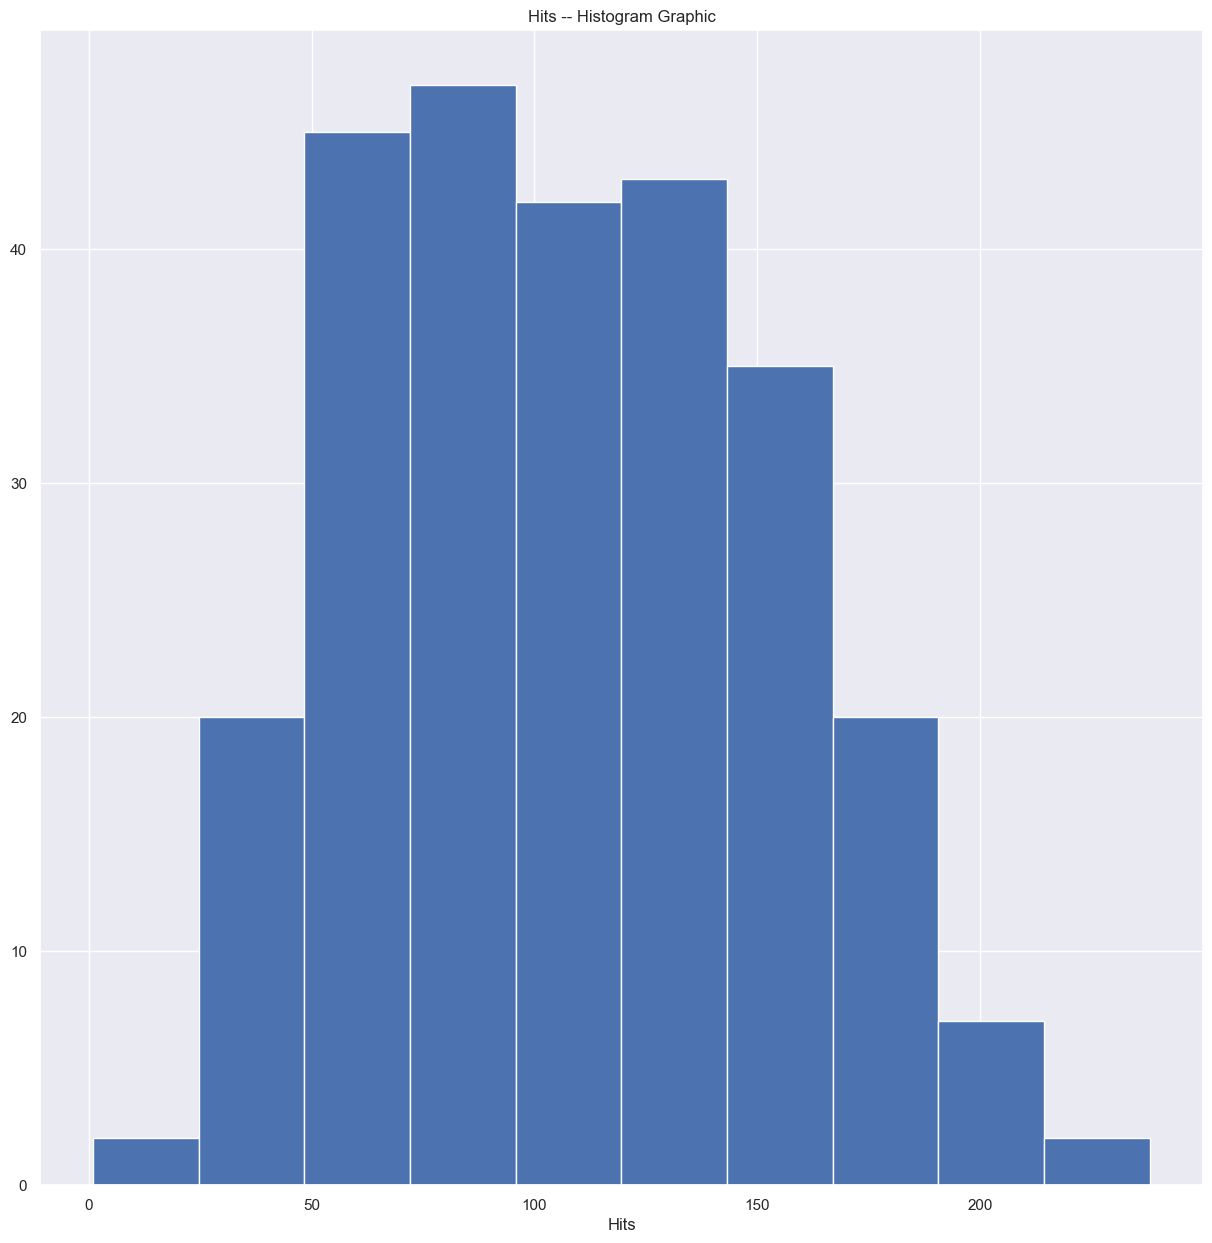

----------------------------------------------
count   263.00
mean     11.62
std       8.76
min       0.00
5%        1.00
10%       2.00
20%       4.00
30%       5.00
40%       7.00
50%       9.00
60%      12.00
70%      16.00
80%      20.00
90%      25.00
99%      33.00
max      40.00
Name: HmRun, dtype: float64
----------------------------------------------


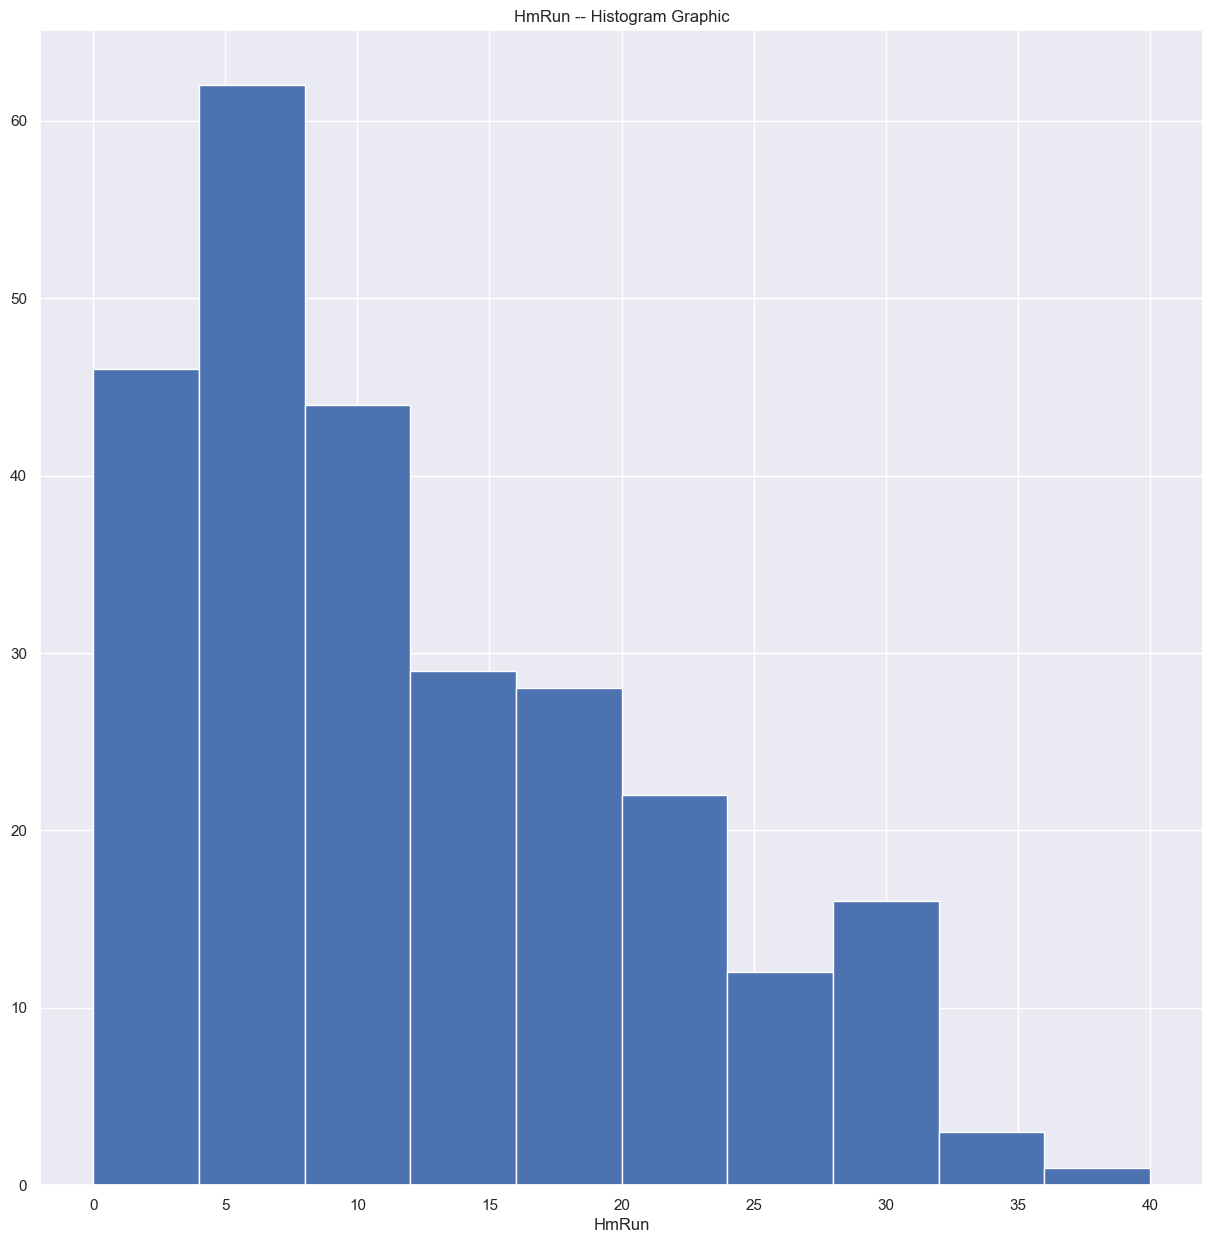

----------------------------------------------
count   263.00
mean     54.75
std      25.54
min       0.00
5%       19.10
10%      24.00
20%      31.00
30%      37.00
40%      45.00
50%      52.00
60%      61.00
70%      68.40
80%      77.60
90%      90.00
99%     111.42
max     130.00
Name: Runs, dtype: float64
----------------------------------------------


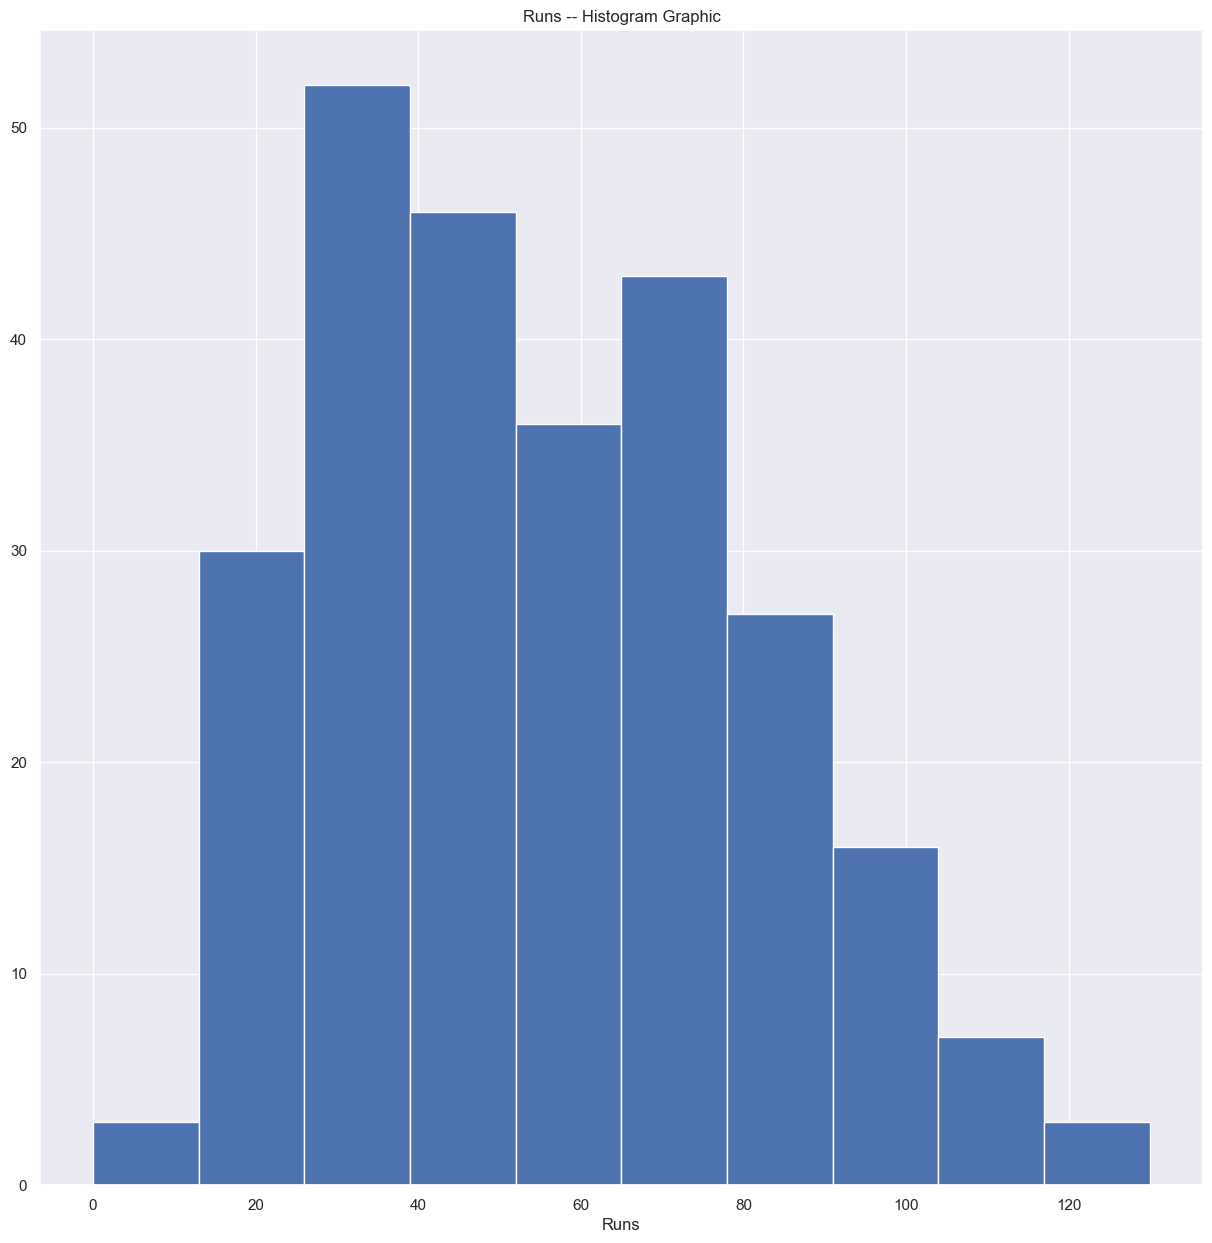

----------------------------------------------
count   263.00
mean     51.49
std      25.88
min       0.00
5%       18.00
10%      23.00
20%      28.40
30%      33.60
40%      42.00
50%      47.00
60%      53.20
70%      61.40
80%      75.60
90%      88.00
99%     114.14
max     121.00
Name: RBI, dtype: float64
----------------------------------------------


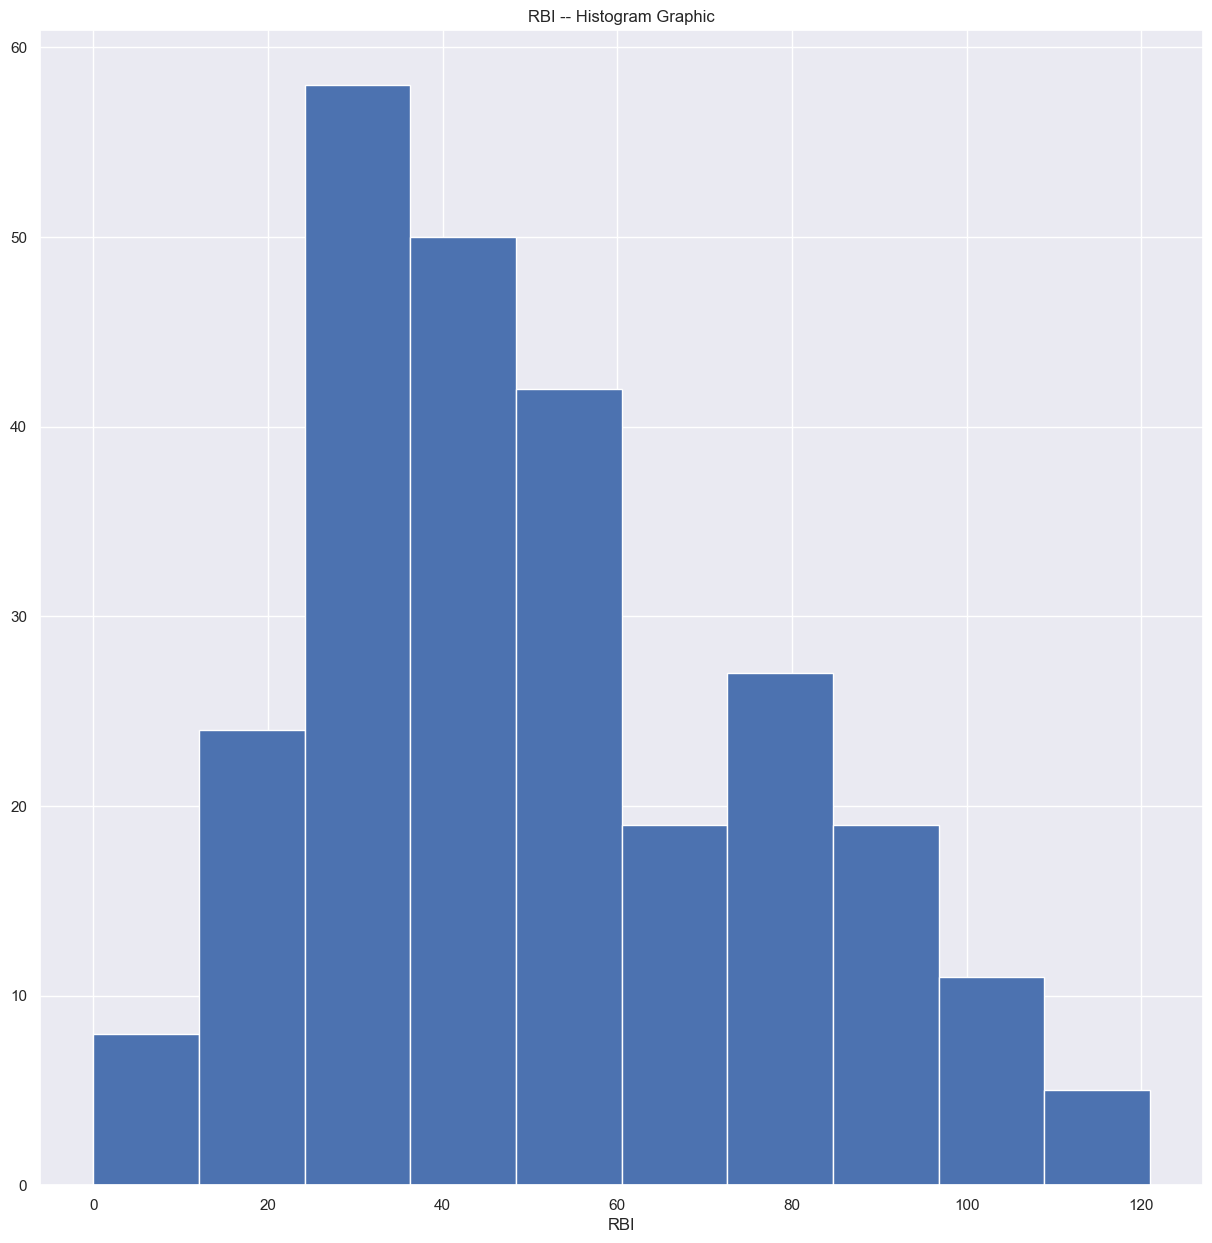

----------------------------------------------
count   263.00
mean     41.11
std      21.72
min       0.00
5%       12.00
10%      16.00
20%      21.00
30%      26.60
40%      32.00
50%      37.00
60%      43.00
70%      53.00
80%      62.00
90%      71.80
99%      94.00
max     105.00
Name: Walks, dtype: float64
----------------------------------------------


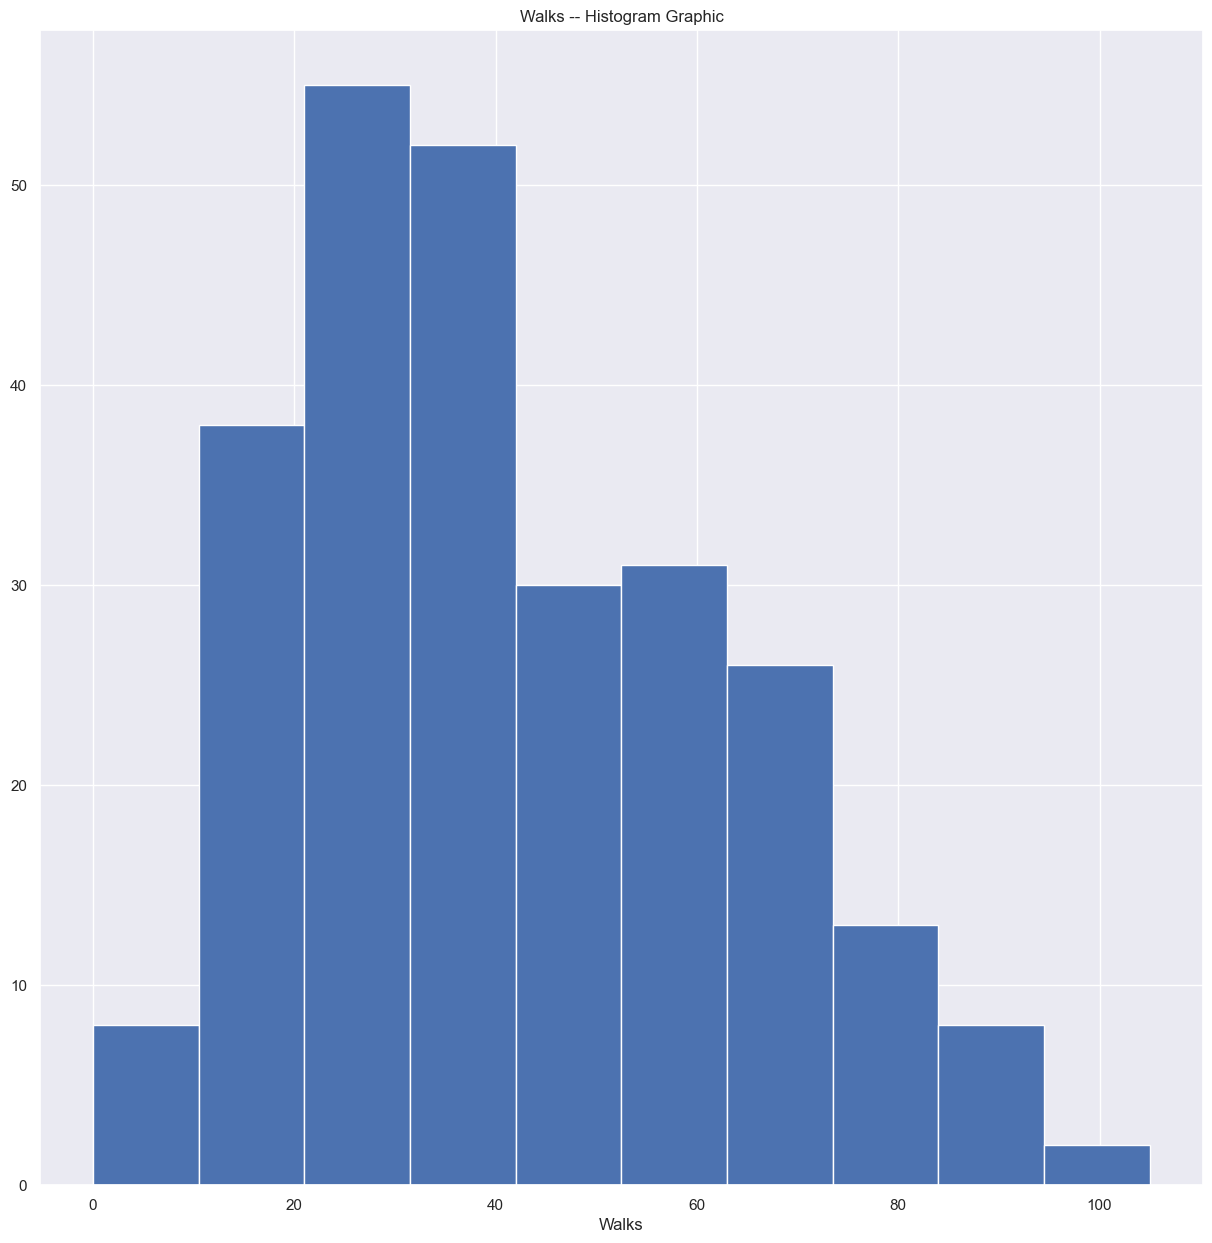

----------------------------------------------
count   263.00
mean      7.31
std       4.79
min       1.00
5%        1.00
10%       2.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       7.00
70%       9.00
80%      12.00
90%      14.00
99%      19.38
max      24.00
Name: Years, dtype: float64
----------------------------------------------


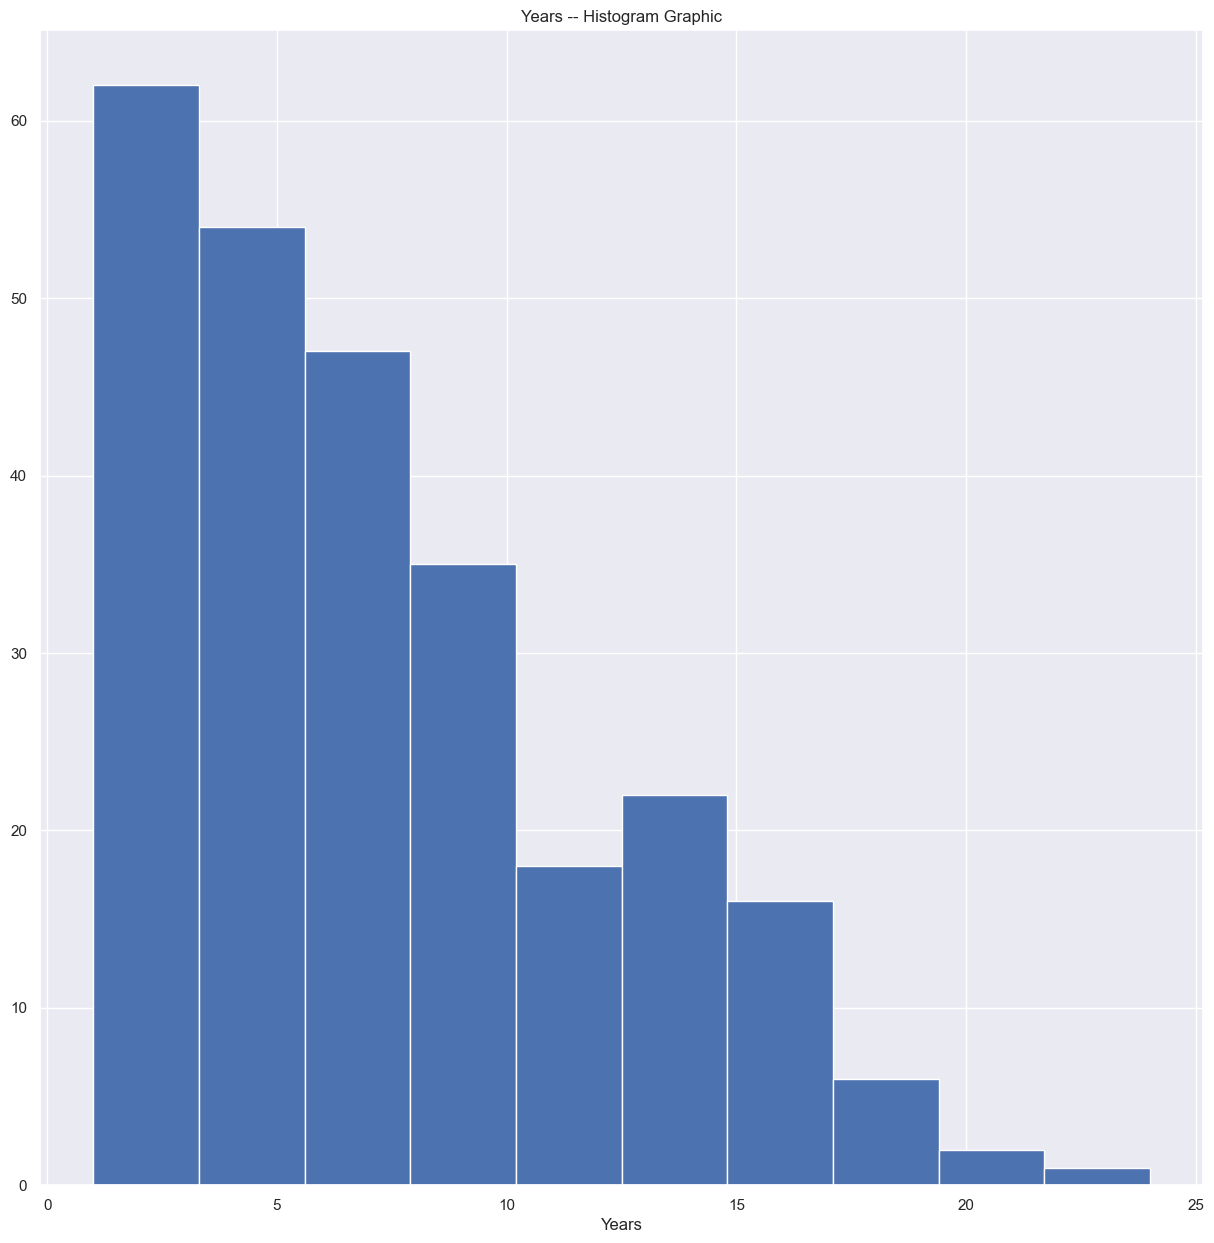

----------------------------------------------
count     263.00
mean     2657.54
std      2286.58
min        19.00
5%        279.90
10%       413.60
20%       680.80
30%       993.40
40%      1488.20
50%      1931.00
60%      2696.60
70%      3269.40
80%      4406.80
90%      6098.00
99%      8732.34
max     14053.00
Name: CAtBat, dtype: float64
----------------------------------------------


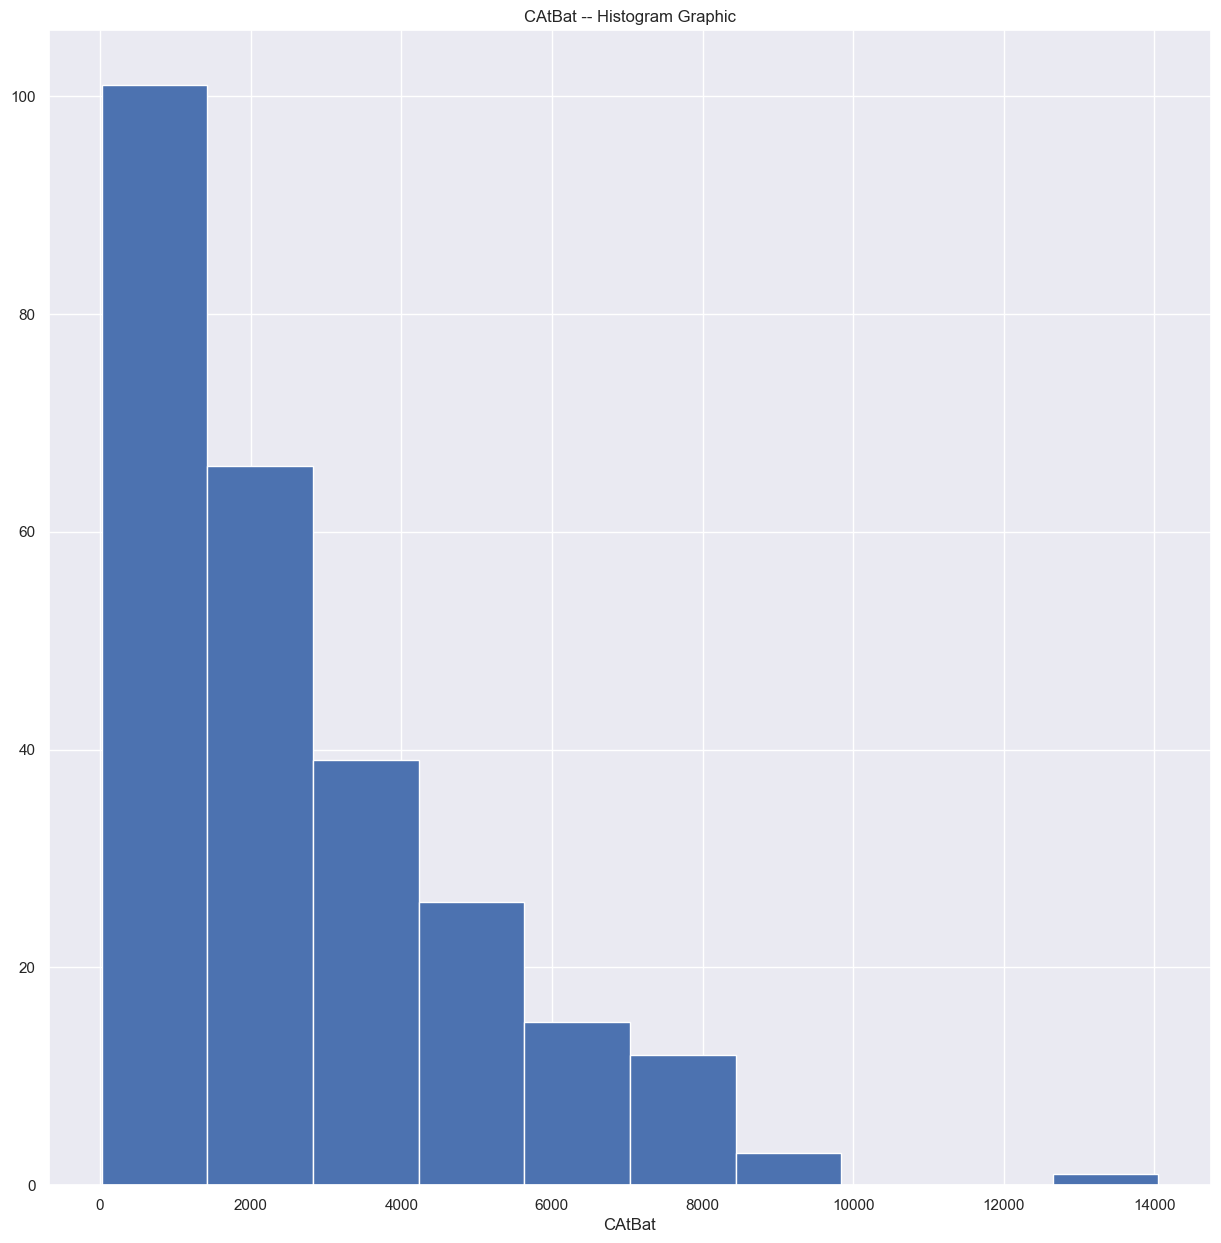

----------------------------------------------
count    263.00
mean     721.29
std      643.43
min        4.00
5%        68.00
10%      102.20
20%      170.80
30%      257.80
40%      389.00
50%      516.00
60%      717.60
70%      892.00
80%     1209.00
90%     1658.00
99%     2481.48
max     4020.00
Name: CHits, dtype: float64
----------------------------------------------


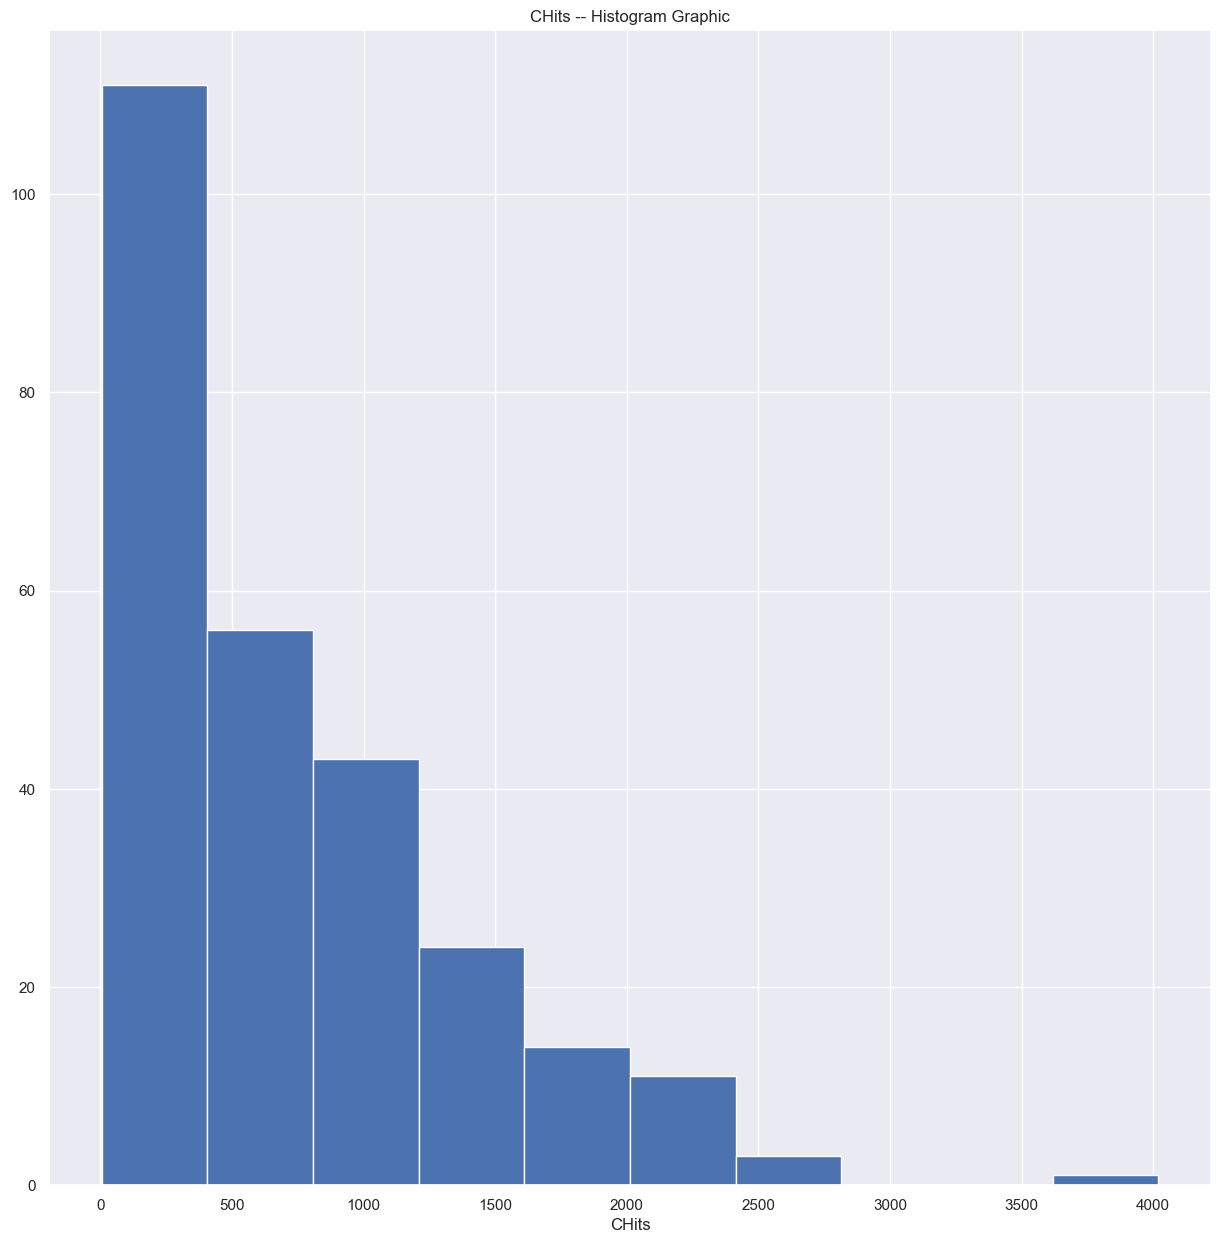

----------------------------------------------
count   263.00
mean     68.99
std      80.80
min       0.00
5%        2.00
10%       5.00
20%      12.00
30%      18.20
40%      29.80
50%      40.00
60%      55.20
70%      77.40
80%     105.80
90%     174.80
99%     348.52
max     481.25
Name: CHmRun, dtype: float64
----------------------------------------------


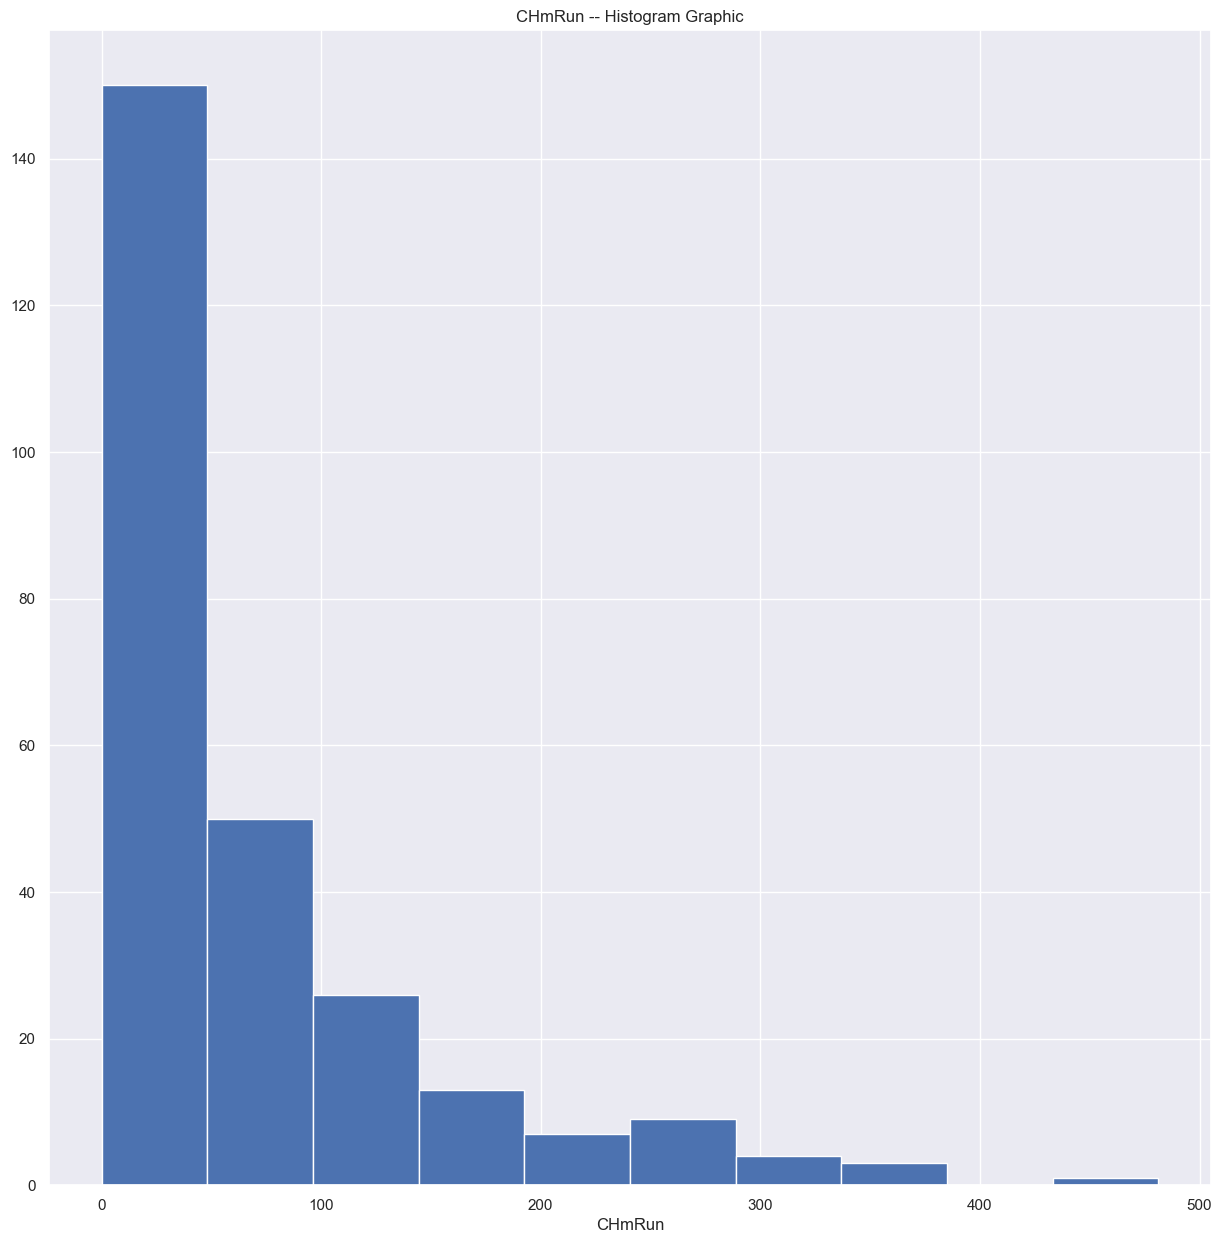

----------------------------------------------
count    263.00
mean     361.22
std      331.20
min        2.00
5%        32.00
10%       51.80
20%       87.40
30%      128.60
40%      196.00
50%      250.00
60%      335.60
70%      436.80
80%      602.20
90%      879.60
99%     1173.14
max     2165.00
Name: CRuns, dtype: float64
----------------------------------------------


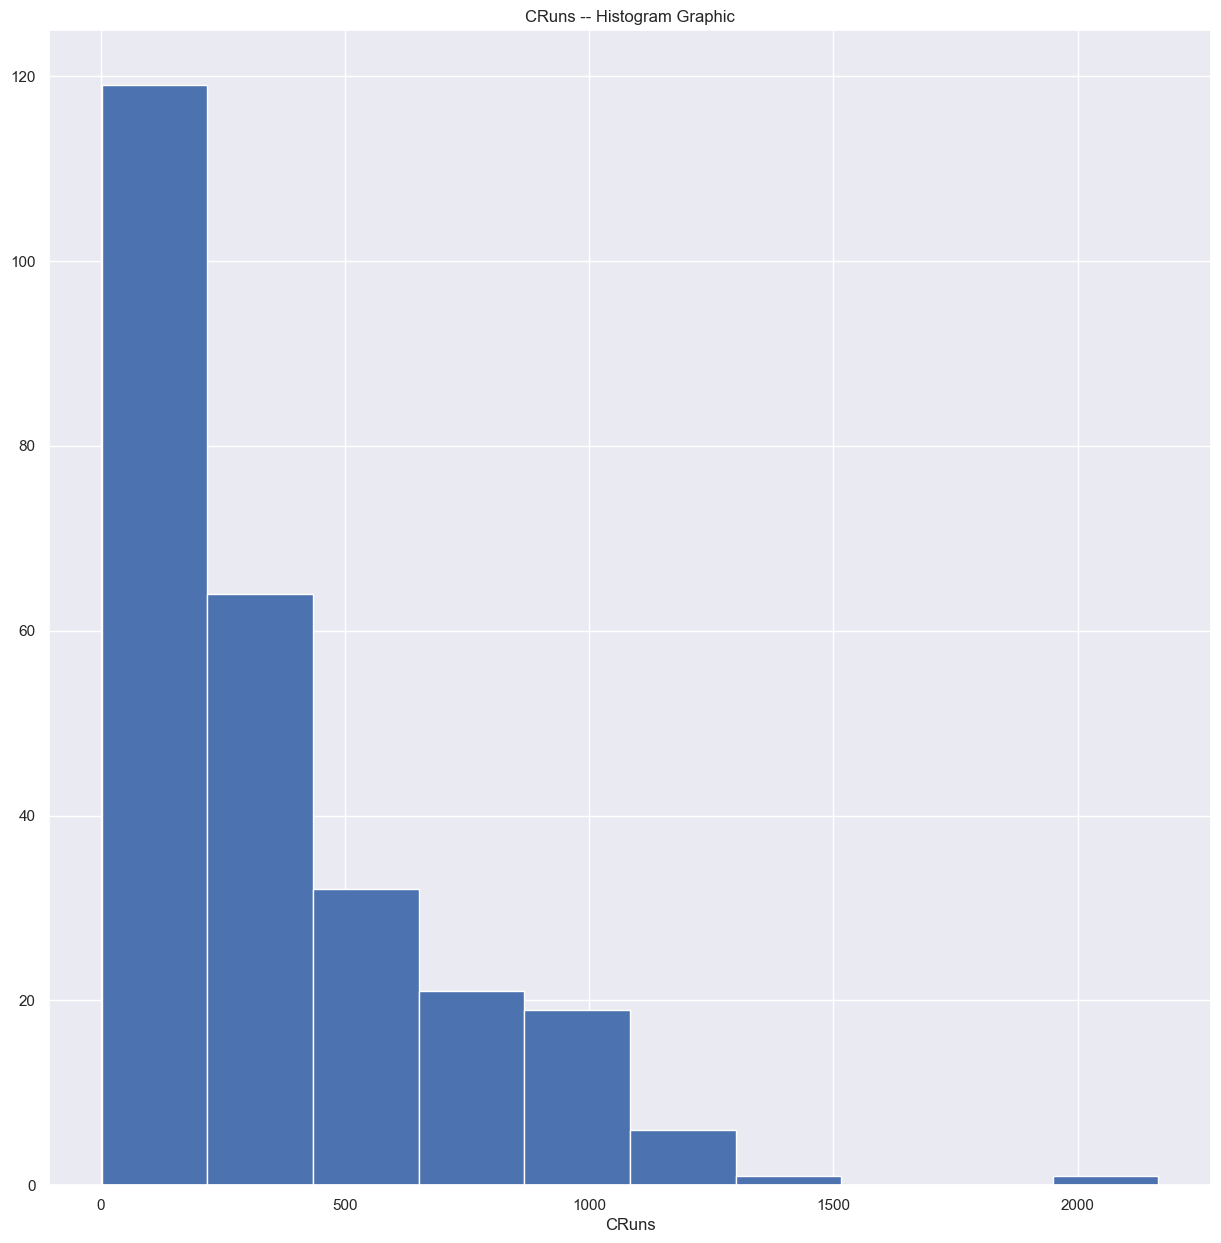

----------------------------------------------
count    263.00
mean     330.42
std      323.37
min        3.00
5%        29.20
10%       38.20
20%       75.00
30%      110.00
40%      160.60
50%      230.00
60%      316.60
70%      380.80
80%      487.80
90%      835.80
99%     1304.70
max     1659.00
Name: CRBI, dtype: float64
----------------------------------------------


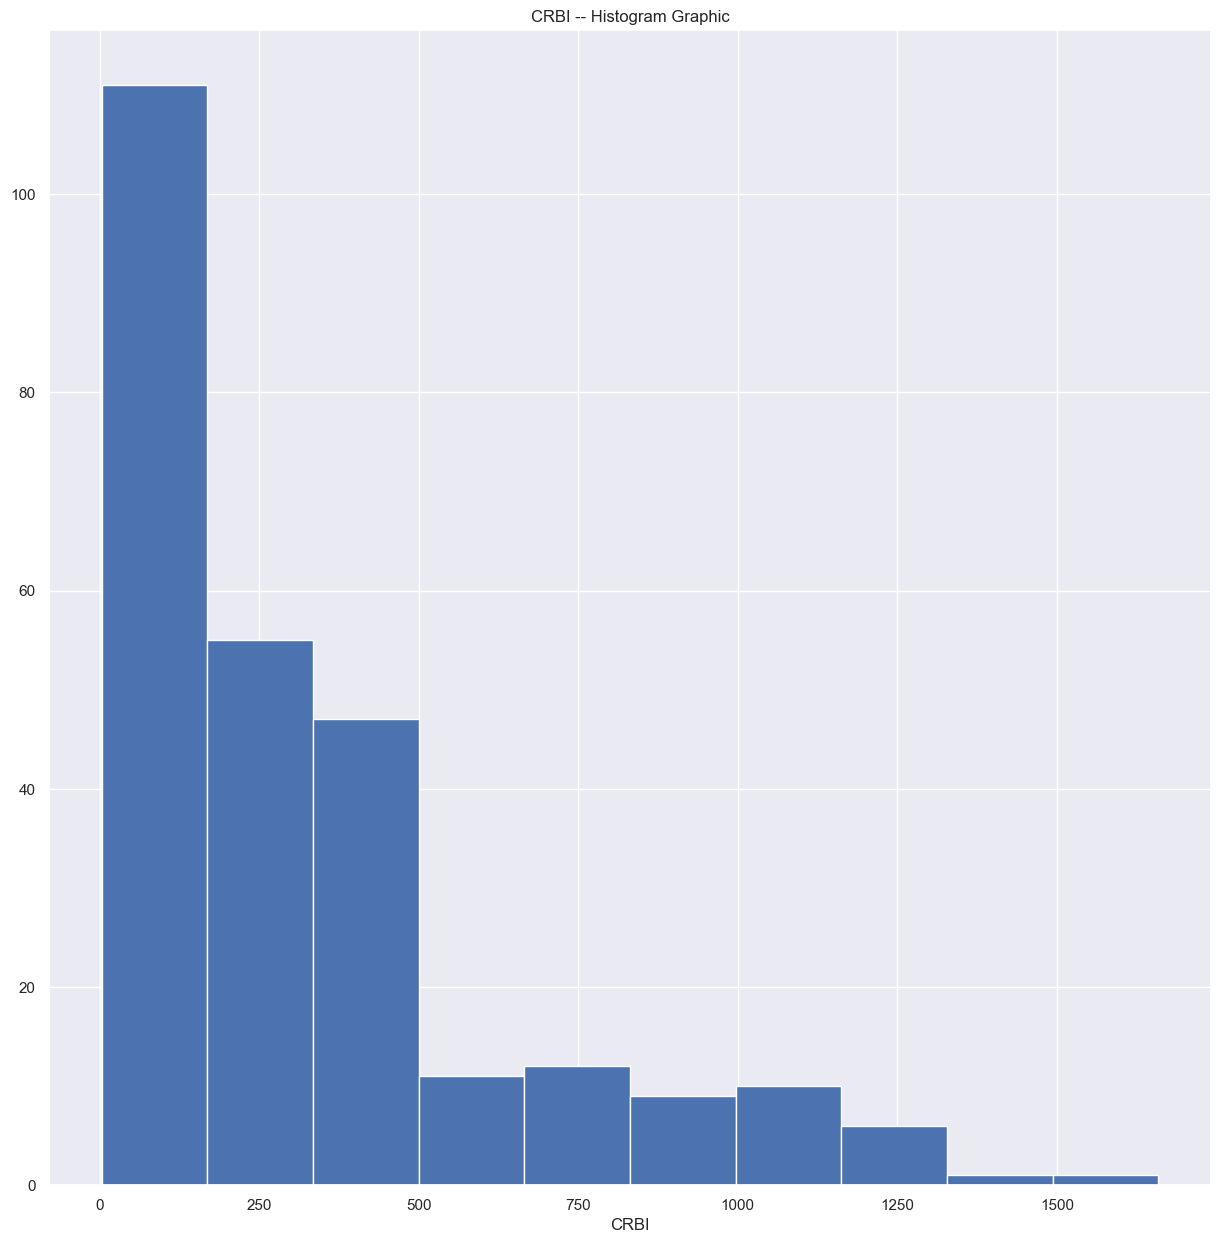

----------------------------------------------
count    263.00
mean     260.26
std      264.03
min        1.00
5%        22.20
10%       33.20
20%       59.20
30%       87.00
40%      132.80
50%      174.00
60%      226.20
70%      296.80
80%      404.80
90%      641.40
99%     1165.30
max     1564.60
Name: CWalks, dtype: float64
----------------------------------------------


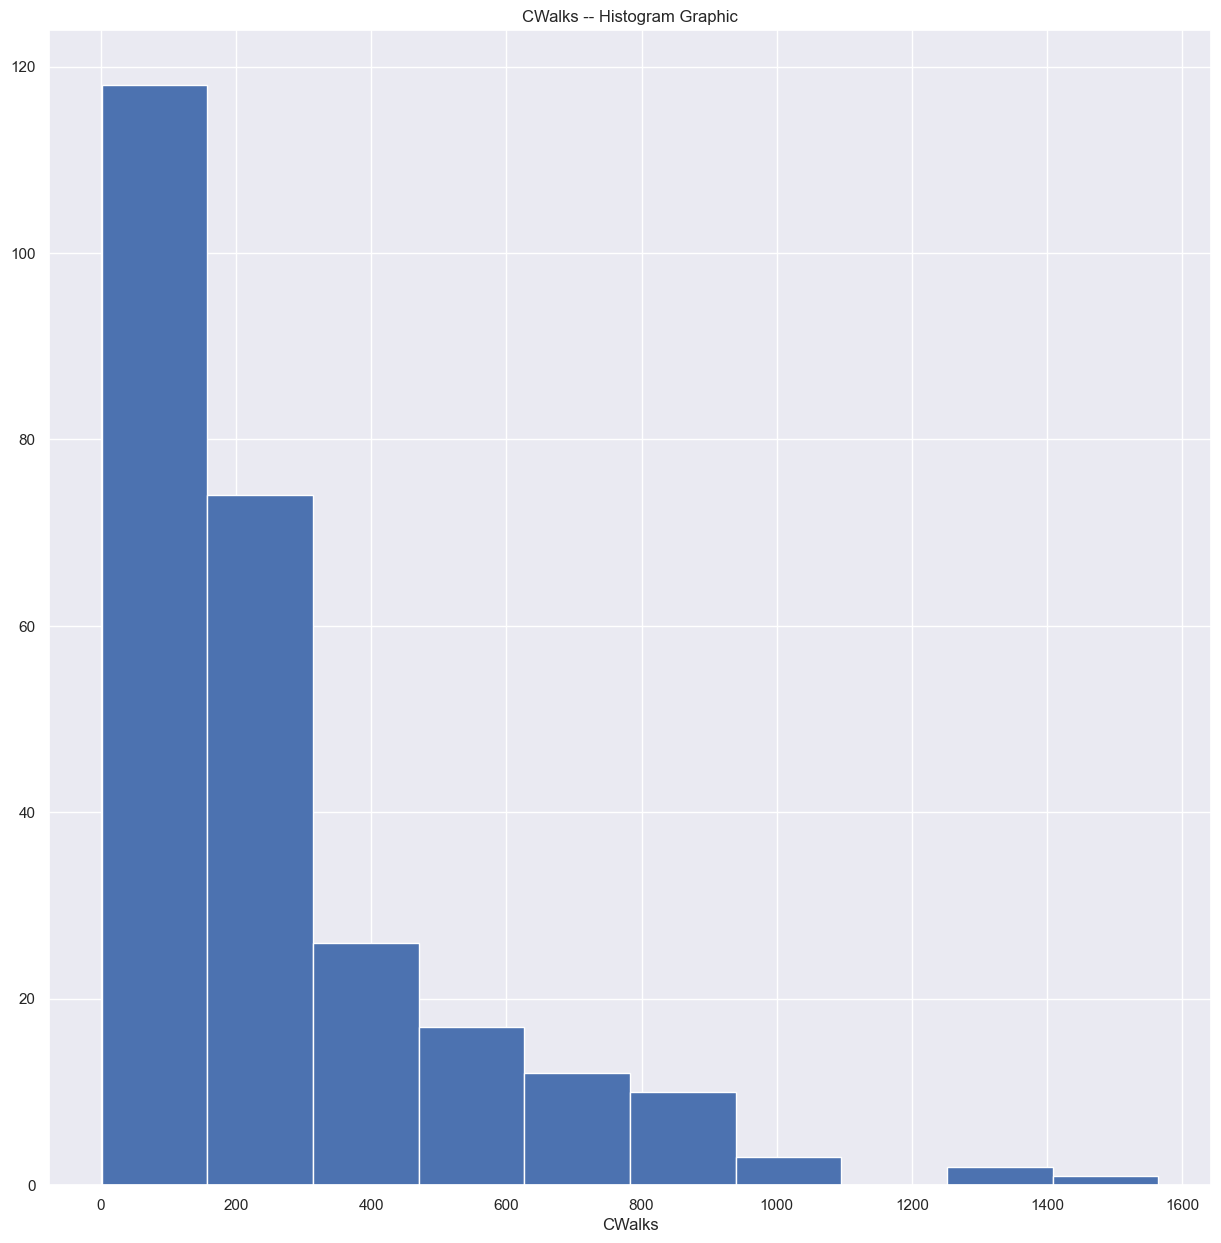

----------------------------------------------
count    263.00
mean     290.71
std      279.93
min        0.00
5%        37.40
10%       62.60
20%      102.00
30%      136.20
40%      172.00
50%      224.00
60%      267.40
70%      303.00
80%      358.60
90%      679.60
99%     1276.18
max     1377.00
Name: PutOuts, dtype: float64
----------------------------------------------


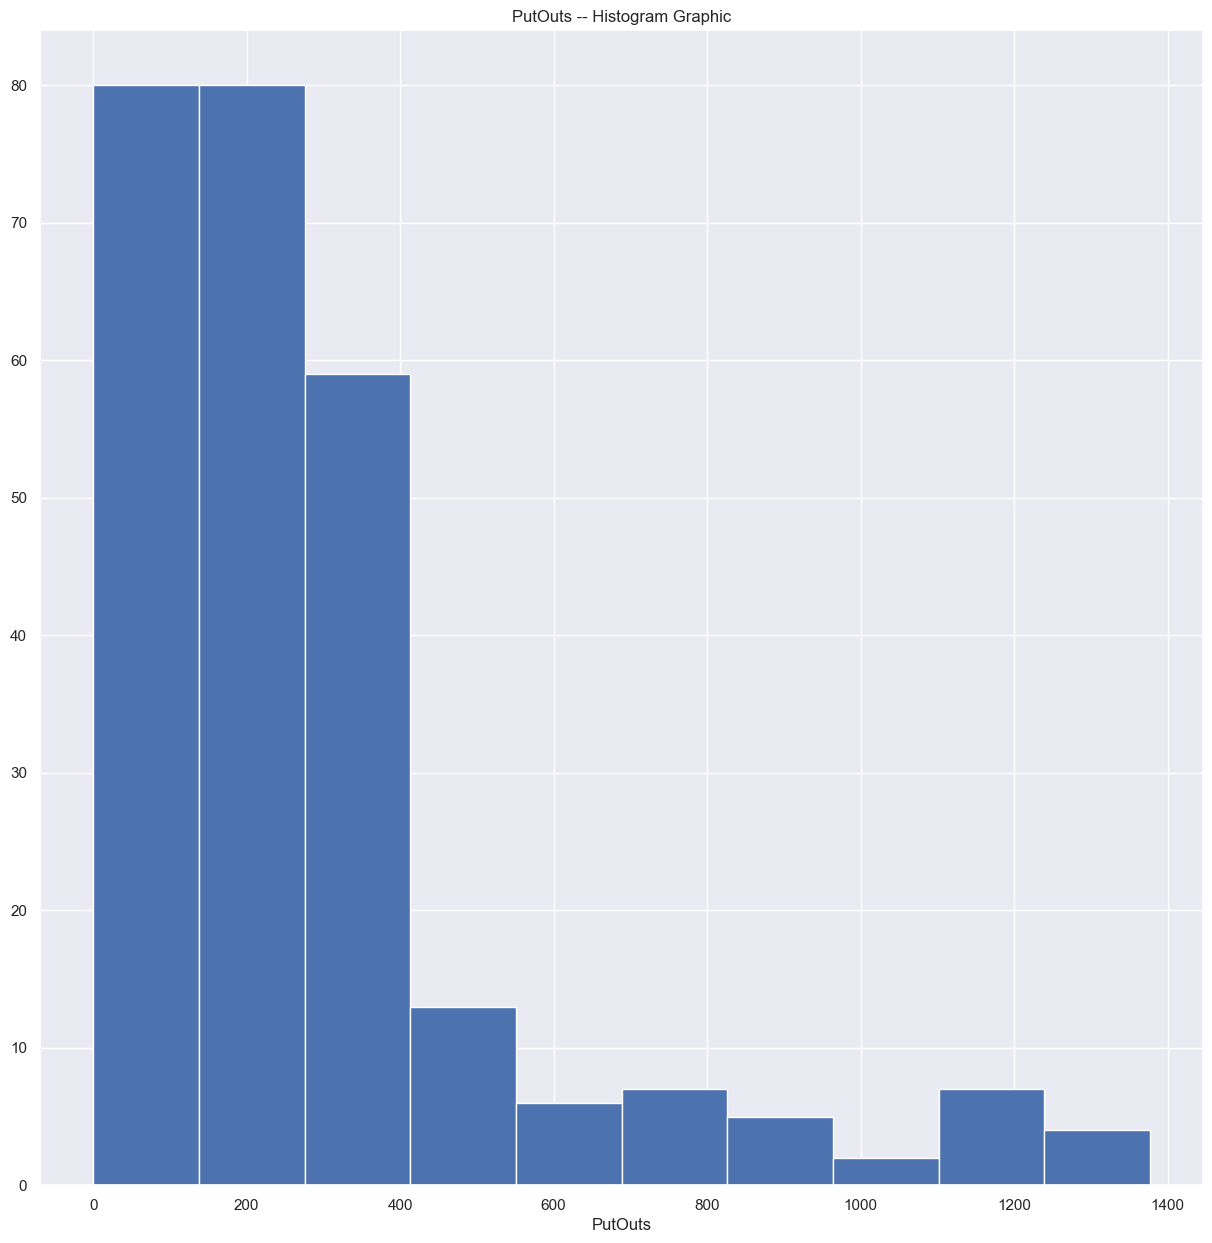

----------------------------------------------
count   263.00
mean    118.76
std     145.08
min       0.00
5%        0.10
10%       3.00
20%       6.00
30%       9.00
40%      17.80
50%      45.00
60%      90.60
70%     151.40
80%     252.60
90%     373.60
99%     480.14
max     492.00
Name: Assists, dtype: float64
----------------------------------------------


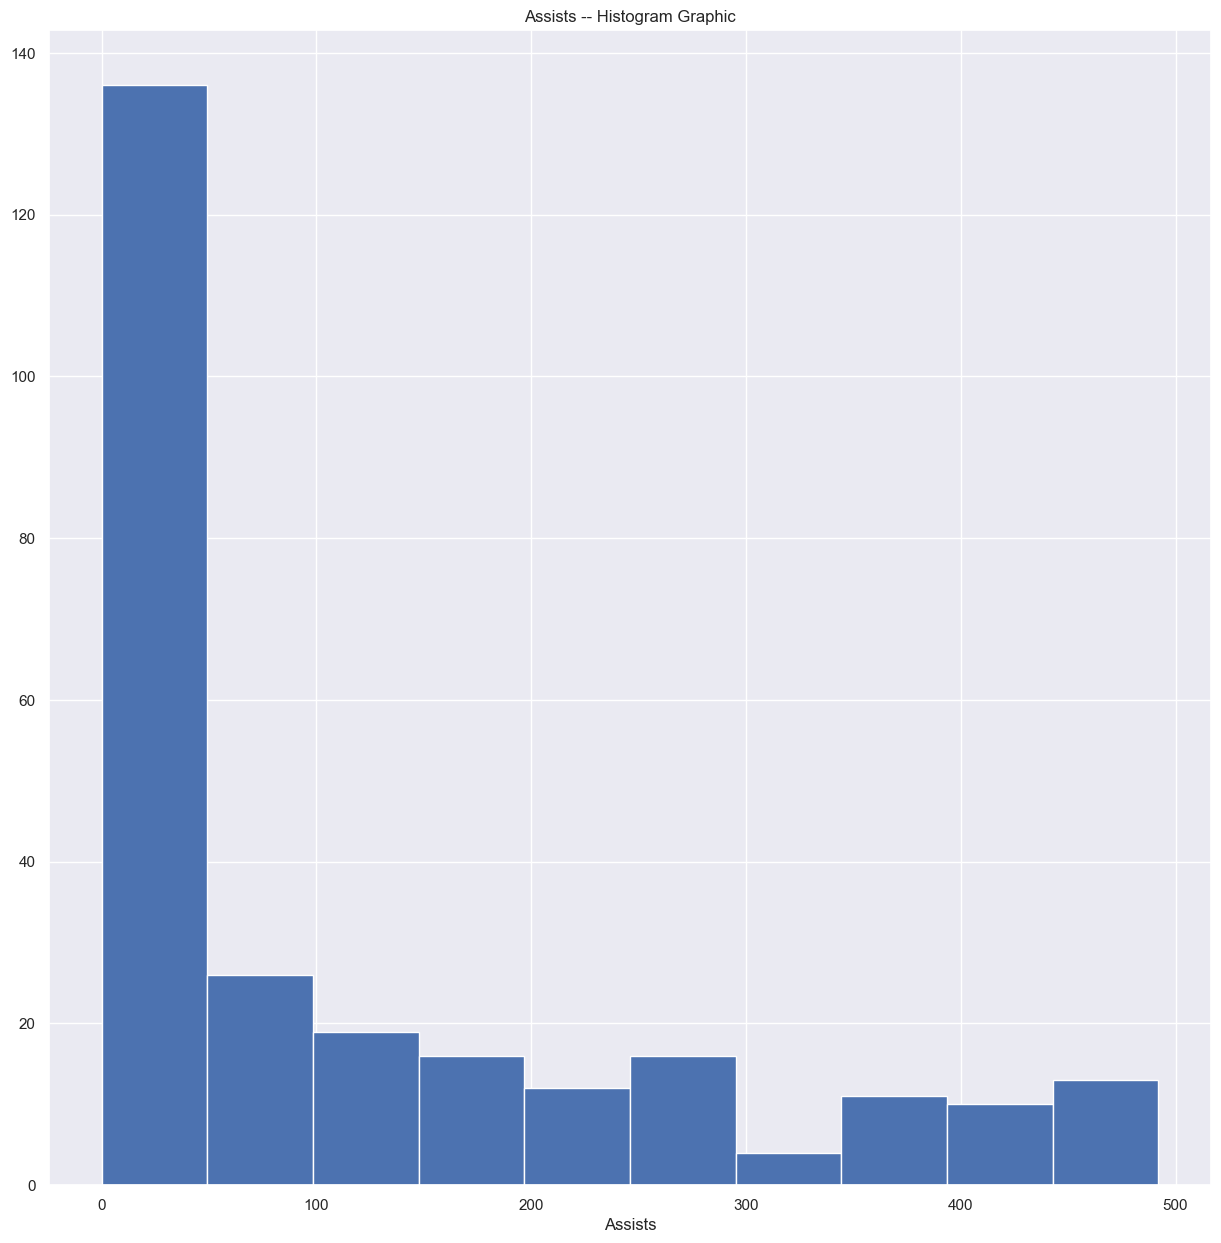

----------------------------------------------
count   263.00
mean      8.59
std       6.61
min       0.00
5%        0.10
10%       2.00
20%       3.00
30%       4.00
40%       5.00
50%       7.00
60%       9.00
70%      11.00
80%      15.00
90%      18.00
99%      26.00
max      32.00
Name: Errors, dtype: float64
----------------------------------------------


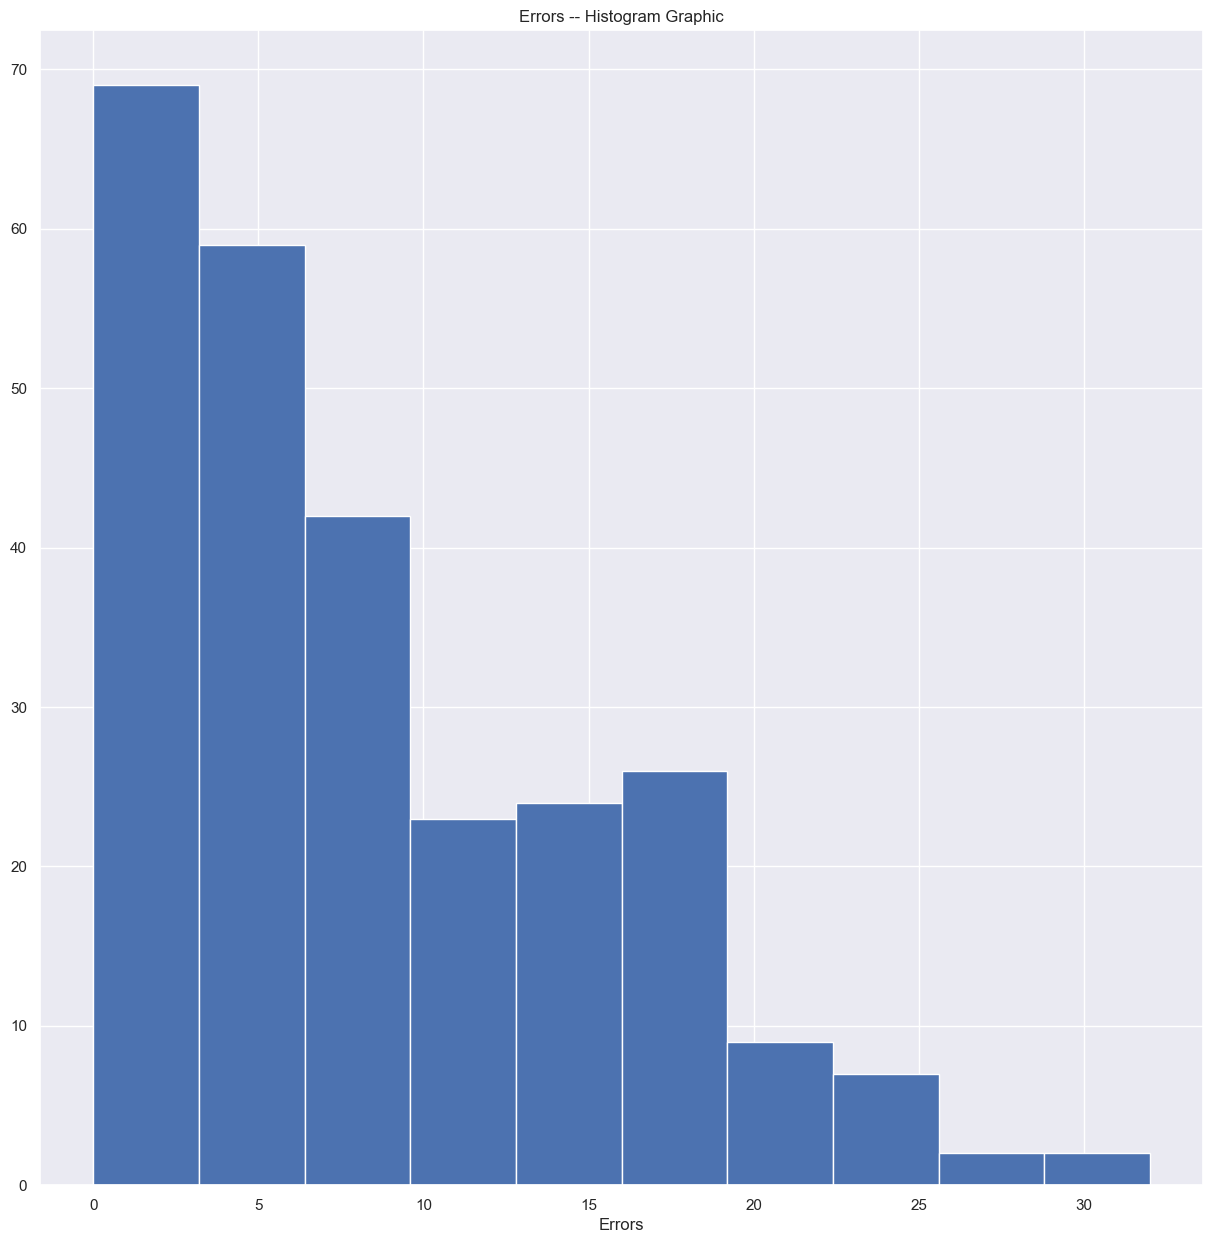

----------------------------------------------
count    263.00
mean     535.93
std      451.12
min       67.50
5%        86.60
10%      100.00
20%      155.00
30%      221.00
40%      300.00
50%      425.00
60%      538.00
70%      700.00
80%      809.00
90%     1048.67
99%     2032.89
max     2460.00
Name: Salary, dtype: float64
----------------------------------------------


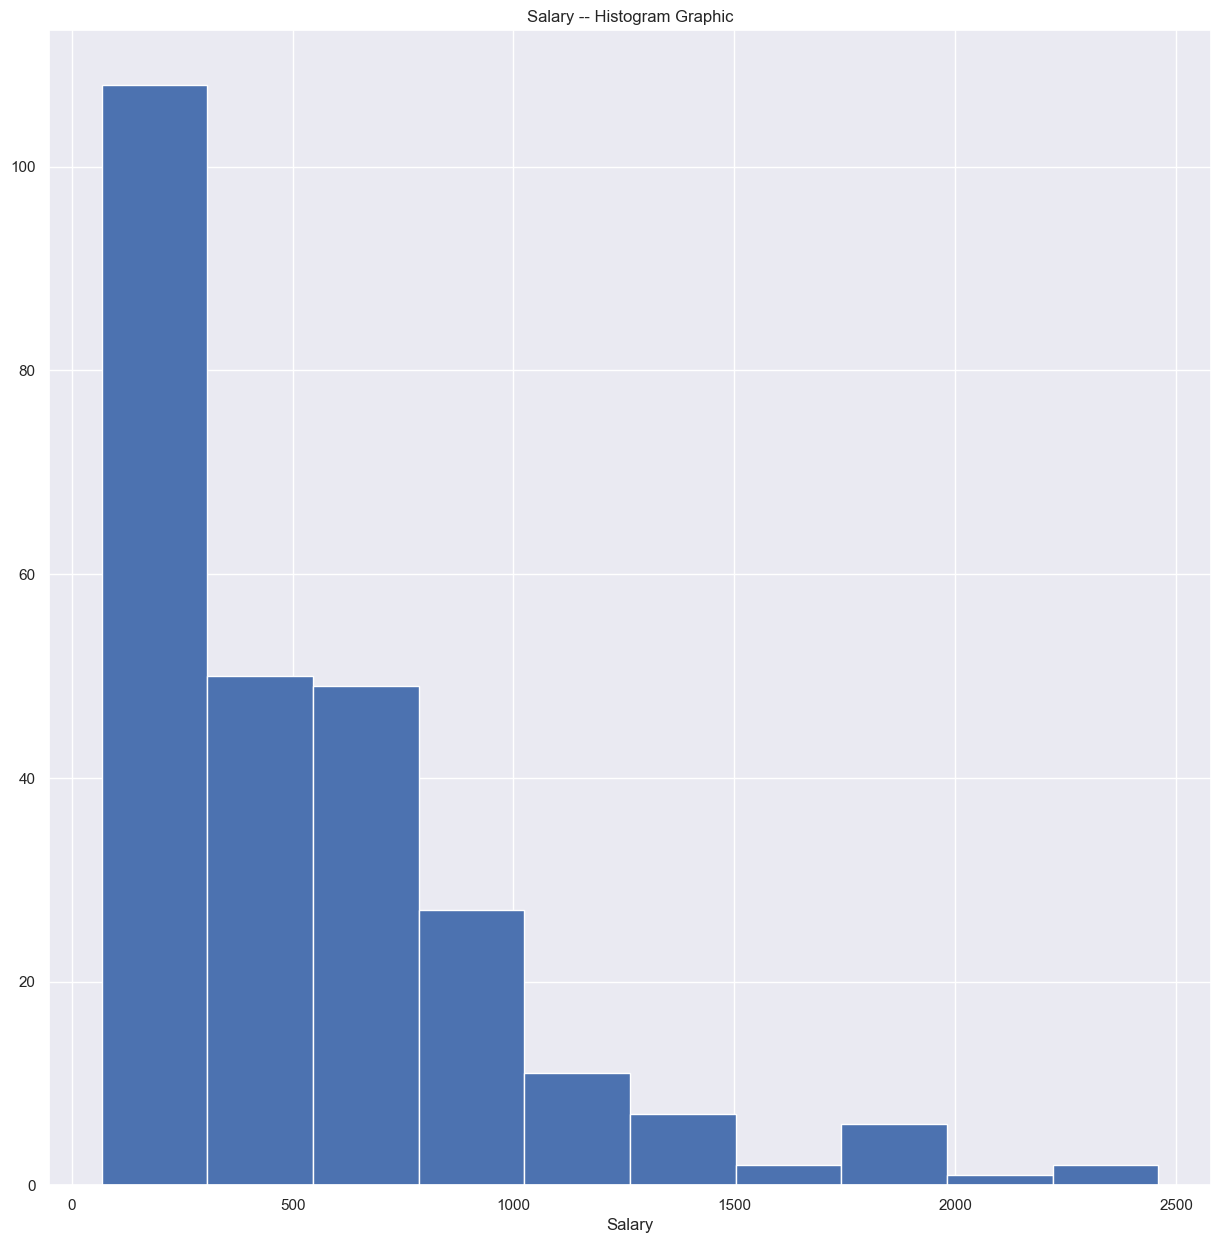

In [383]:
for col in num_cols:
    num_summary(df, col, True)

### Analysis of Correlation (Korelasyon Analizi)

In [384]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe[num_cols].corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu", linewidths=.5, cbar_kws={"shrink": 0.75})
        plt.show()
    return drop_list

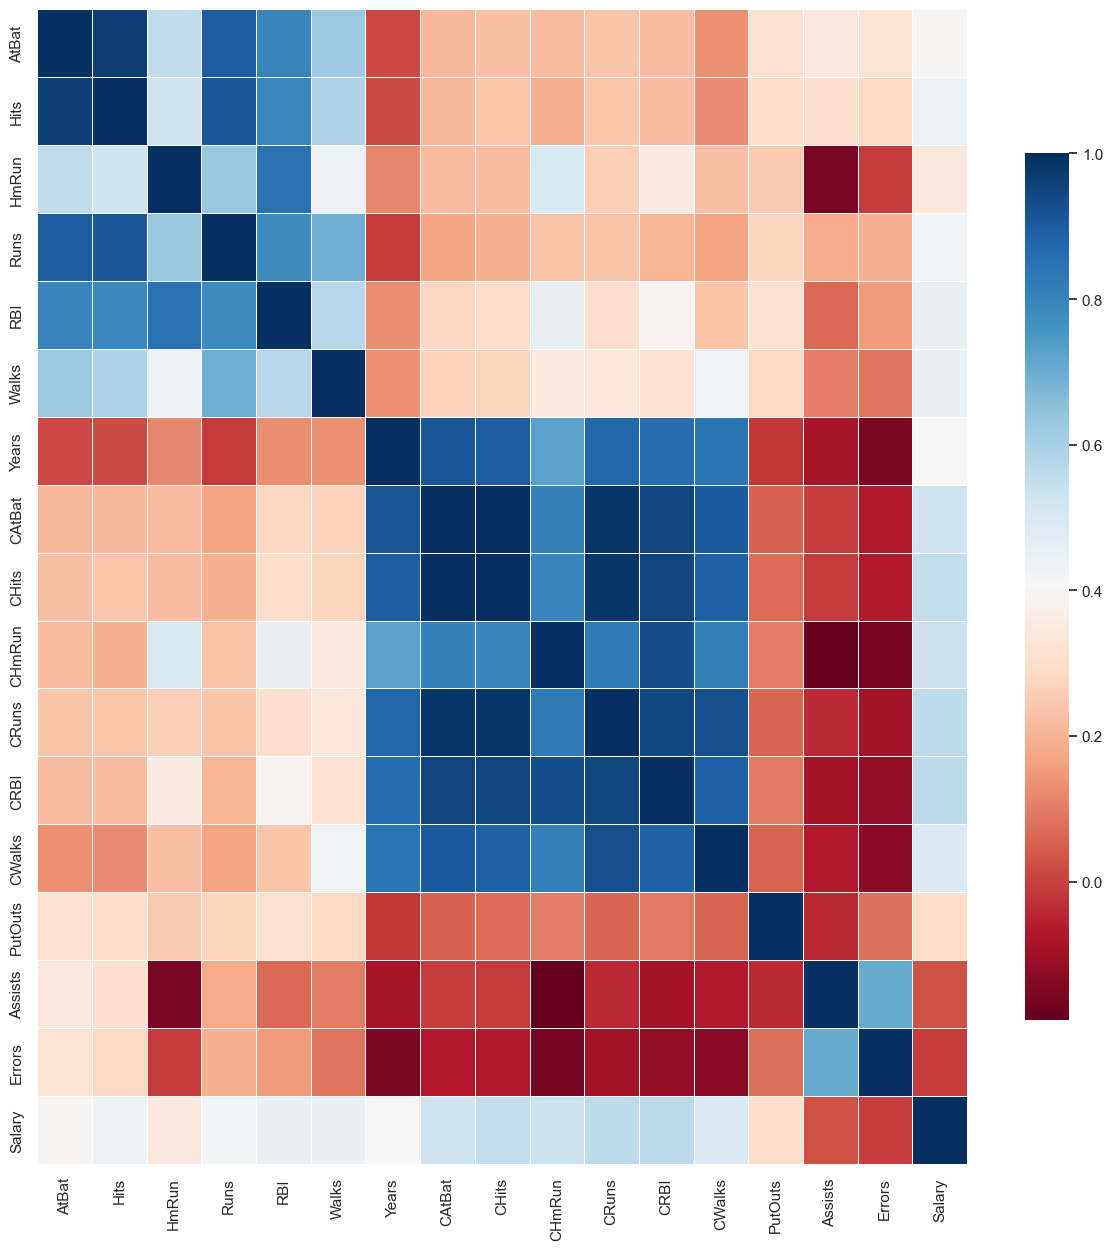

['Hits', 'Runs', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

In [385]:
high_correlated_cols(df, plot=True)

### 3. Feature Extraction (Özellik Çıkarımı)

In [386]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [387]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [388]:
new_num_cols = [col for col in num_cols if col not in ['Salary', 'Year']]

In [389]:
df[(df[new_num_cols] == 0).any(axis=1)]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
7,298,73,0,24,24,7,3,509,108.00,0.00,41,37,12.00,A,W,121,283,9,100.00,A
9,401,92,17,49,66,65,13,5206,1332.00,253.00,784,890,866.00,A,E,0,0,0,1100.00,A
13,239,60,0,30,11,22,6,1941,510.00,4.00,309,103,207.00,A,E,121,151,6,700.00,A
62,236,56,0,27,15,11,4,1115,270.00,1.00,116,64,57.00,A,W,125,199,13,230.00,A
65,585,139,31,93,94,62,17,7546,1982.00,315.00,1141,1179,727.00,A,E,0,0,0,950.00,A
132,278,70,7,22,37,18,18,7186,2081.00,190.00,935,1088,643.00,A,W,0,0,0,325.00,A
146,160,39,8,18,31,22,14,2128,543.00,56.00,304,268,298.00,A,E,33,3,0,275.00,A
149,210,70,13,32,51,28,15,4040,1130.00,97.00,544,462,551.00,A,E,0,0,0,365.00,A
174,184,47,5,20,28,18,11,3327,890.00,74.00,419,382,304.00,N,W,49,2,0,450.00,N
176,181,58,6,34,23,22,1,181,58.00,6.00,34,23,22.00,N,W,88,0,3,86.50,N


In [390]:
df[new_num_cols] = df[new_num_cols] + 1

In [391]:
df[(df[new_num_cols] == 0).any(axis=1)]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague


In [392]:
df.columns = [col.upper() for col in df.columns]

In [393]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


### Ratio of Variables (Değişkenlerin Oranı)

In [394]:
# CAREER RUNS RATIO
df["NEW_C_RUNS_RATIO"] = df["RUNS"] / df["CRUNS"]

# CAREER BAT RATIO
df["NEW_C_ATBAT_RATIO"] = df["ATBAT"] / df["CATBAT"]

# CAREER HITS RATIO
df["NEW_C_HITS_RATIO"] = df["HITS"] / df["CHITS"]

# CAREER HMRUN RATIO
df["NEW_C_HMRUN_RATIO"] = df["HMRUN"] / df["CHMRUN"]

# CAREER RBI RATIO
df["NEW_C_RBI_RATIO"] = df["RBI"] / df["CRBI"]

# CAREER WALKS RATIO
df["NEW_C_WALKS_RATIO"] = df["WALKS"] / df["CWALKS"]
df["NEW_C_HIT_RATE"] = df["CHITS"] / df["CATBAT"]

# PLAYER TYPE : RUNNER
df["NEW_C_RUNNER"] = df["CRBI"] / df["CHITS"]

# PLAYER TYPE : HIT AND RUN
df["NEW_C_HIT-AND-RUN"] = df["CRUNS"] / df["CHITS"]

# MOST VALUABLE HIT RATIO IN HITS
df["NEW_C_HMHITS_RATIO"] = df["CHMRUN"] / df["CHITS"]

# MOST VALUABLE HIT RATIO IN ALL SHOTS
df["NEW_C_HMATBAT_RATIO"] = df["CATBAT"] / df["CHMRUN"]

In [395]:
#Annual Averages
df["NEW_CATBAT_MEAN"] = df["CATBAT"] / df["YEARS"]
df["NEW_CHITS_MEAN"] = df["CHITS"] / df["YEARS"]
df["NEW_CHMRUN_MEAN"] = df["CHMRUN"] / df["YEARS"]
df["NEW_CRUNS_MEAN"] = df["CRUNS"] / df["YEARS"]
df["NEW_CRBI_MEAN"] = df["CRBI"] / df["YEARS"]
df["NEW_CWALKS_MEAN"] = df["CWALKS"] / df["YEARS"]

In [396]:
# PLAYER LEVEL
df.loc[(df["YEARS"] <= 2), "NEW_YEARS_LEVEL"] = "Junior"
df.loc[(df["YEARS"] > 2) & (df['YEARS'] <= 5), "NEW_YEARS_LEVEL"] = "Mid"
df.loc[(df["YEARS"] > 5) & (df['YEARS'] <= 10), "NEW_YEARS_LEVEL"] = "Senior"
df.loc[(df["YEARS"] > 10), "NEW_YEARS_LEVEL"] = "Expert"

In [397]:
# PLAYER LEVEL X DIVISION
df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Junior-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Junior-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Mid-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Mid-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Senior-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Senior-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Expert-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Expert-West"

In [398]:
# Player Promotion to Next League
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "StandN"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "StandA"
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "Descend"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "Ascend"

In [399]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 40
cat_cols: 6
num_cols: 34
cat_but_car: 0
num_but_cat: 0


## 4.ENCODING

### Label Encoding

In [400]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [401]:
binary_cols = [col for col in df.columns if
               df[col].dtype not in [int, float] and df[col].nunique() == 2]


In [402]:
for col in binary_cols:
    df = label_encoder(df, col)

### Rare Encoding

In [403]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ':', len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")
        print("##################################################################")
        

In [404]:
rare_analyser(df,"SALARY", cat_cols)

LEAGUE : 2
        COUNT  RATIO  TARGET_MEAN
LEAGUE                           
0         139   0.53       542.00
1         124   0.47       529.12


##################################################################
DIVISION : 2
          COUNT  RATIO  TARGET_MEAN
DIVISION                           
0           129   0.49       624.27
1           134   0.51       450.88


##################################################################
NEWLEAGUE : 2
           COUNT  RATIO  TARGET_MEAN
NEWLEAGUE                           
0            141   0.54       537.11
1            122   0.46       534.55


##################################################################
NEW_YEARS_LEVEL : 4
                 COUNT  RATIO  TARGET_MEAN
NEW_YEARS_LEVEL                           
Expert              77   0.29       747.54
Junior              17   0.06       149.65
Mid                 73   0.28       243.57
Senior              96   0.37       656.90


###############################################

In [405]:
def rare_encoder(dataframe, rare_perc, cat_cols):
    temp_df = dataframe.copy()
    rare_columns = [col for col in cat_cols if (temp_df[col].value_counts() / len(temp_df) < rare_perc).sum() > 1]

    for col in rare_columns:
        tmp = temp_df[col].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[col] = np.where(temp_df[col].isin(rare_labels), 'Rare', temp_df[col])
    return temp_df

In [406]:
df = rare_encoder(df, 0.01, cat_cols)

### One-Hot Encoding

In [407]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [408]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [409]:
df = one_hot_encoder(df, ohe_cols, drop_first=True)

In [410]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 50
cat_cols: 16
num_cols: 34
cat_but_car: 0
num_but_cat: 16


In [411]:
num_cols.remove("SALARY")

## 5. FEATURE SCALLING (Özellik Ölçeklendirme)

### Robust-Scaler

In [412]:
for col in num_cols:
    transformer = RobustScaler().fit(df[[col]])
    df[col] = transformer.transform(df[[col]])

## Multiple Linear Regression

In [413]:
X = df.drop('SALARY', axis=1)
y = df[['SALARY']]

### Model

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [415]:
reg_model = LinearRegression()

In [416]:
# b + w*x
reg_model.fit(X_train, y_train)

LinearRegression()

In [417]:
# constant ( b, bias, B0)
reg_model.intercept_[0]

576.4652731003471

In [418]:
# coefficients ( w, weights, B1)
reg_model.coef_

array([[ -371.25105084,   277.44315268,  -121.43630361,   131.99245527,
          139.98071477,    94.79330336,  -212.10372616, -1132.78705877,
         1894.21154508,   257.02059959,  -425.94836214,  -402.50112032,
           80.55593134,   -12.11289551,   -55.23900432,    40.11528322,
          -18.1547418 ,    49.97603416,    39.72792728,  -421.51433217,
         1389.01147102,  -970.09962444,   160.57537538,  -388.28504403,
          -91.21965291,  -145.76417912,    -8.52693308,   -45.78226848,
          -45.33493105,     7.17854326, -1013.37747915,   343.34749284,
          121.64845067,   461.05684933,   225.20754471,   -36.68855515,
          -46.25245984,  -110.23487934,   -10.37110062,    16.84116615,
          -54.31887312,     8.06641328,   -73.56404088,   -36.67083846,
           33.10464468,   -43.4757453 ,    -8.81753915,   -30.91038813,
           -3.29535636]])

In [419]:
# Linear Regression y_hat = b + w * x
np.inner(X_train.iloc[2, :].values, reg_model.coef_) + reg_model.intercept_

array([648.4137102433205], dtype=object)

In [420]:
y_train.iloc[2]

SALARY   600.00
Name: 23, dtype: float64

In [421]:
np.inner(X_train.iloc[4, :].values, reg_model.coef_) + reg_model.intercept_

array([352.7339004170019], dtype=object)

In [422]:
y_train.iloc[4]

SALARY   245.00
Name: 297, dtype: float64

## PREDICTION (Tahmin)

### Prediction Success Evaluation (Tahmin Başarısı Değerlendirme)

In [423]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

206.9211062883998

In [424]:
# Train R-Square
reg_model.score(X_train, y_train)

0.7816280776410085

In [425]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.9574194976187

In [426]:
# Test R-Square
reg_model.score(X_test, y_test)

0.4467788556168748

In [427]:
# 10-fold cross-validation RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X, y,
                                 cv=10,
                                 scoring='neg_mean_squared_error')))

304.2665811719189